<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/JPL-Caltech/StellarSystemClassification/StellarSystemClassification-NASA-HWC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [490]:
from __future__ import division

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import warnings
from google.colab import drive

In [491]:
pd.options.mode.copy_on_write = True
warnings.filterwarnings("ignore")

In [492]:
# Constants and methods for plotting graphs

# Mapping from exoplanet type to the corresponding color in the plotting graph
exoplanet_type_colors = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan'
}

# Mapping from exoplanet type to the corresponding legend title in the plotting graph
exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants (1,746 in total)',
    'Neptune-Like': 'Neptune Like Planets (1,942 in total)',
    'Super-Earth': 'Super Earths (1,702 in total)',
    'Terrestrial': 'Terrestrial Planets (201 in total)'
}

sun_like_g_star_host_exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants (277 in total)',
    'Neptune-Like': 'Neptune Like Planets (100 in total)',
    'Super-Earth': 'Super Earths (42 in total)',
    'Terrestrial': 'Terrestrial Planets (1 in total)'
}

stellar_system_exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants',
    'Neptune-Like': 'Neptune Like Planets',
    'Super-Earth': 'Super Earths',
    'Terrestrial': 'Terrestrial Planets'
}

solar_system_planets_colors = {
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'royalblue',
    'Mars': 'orangered',
    'Jupiter': 'peru',
    'Saturn': 'gold',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

solar_system_planets_labels = {
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_colors_with_solar_system_planets = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'royalblue',
    'Mars': 'orangered',
    'Jupiter': 'peru',
    'Saturn': 'gold',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

exoplanet_type_labels_with_solar_system_planets = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_with_hz_colors = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'HabitableZone-Planets': 'lime'
}

exoplanet_type_with_hz_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_colors_with_earth = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'HabitableZone-Planets': 'lime',
    'Earth': 'lime'
}

exoplanet_type_with_hz_labels_with_earth = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)',
    'Earth': 'Earth'
}

exoplanet_type_with_hz_zone_inner_colors = {
    'Gas-Giant': 'red',
    'Neptune-Like': 'red',
    'Super-Earth': 'red',
    'Terrestrial': 'red',
    'HabitableZone-Planets': 'red'
}

exoplanet_type_with_hz_zone_inner_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_zone_outer_colors = {
    'Gas-Giant': 'blue',
    'Neptune-Like': 'blue',
    'Super-Earth': 'blue',
    'Terrestrial': 'blue',
    'HabitableZone-Planets': 'blue'
}

exoplanet_type_with_hz_zone_outer_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

# Plot selected exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_selected_exoplanets_with_size_and_label(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  label, # Legend lable for the data points in the graph
                                  scale_size # Scale proportion for circle representing star in graph
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               label=label)

def plot_selected_exoplanets_with_size(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  scale_size, # Scale proportion for circle representing star in graph
                                  linewidths=None
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               linewidths=linewidths)

def plot_exoplanets_with_size_only(ax,
                                   exoplanets_data,
                                   x_field,
                                   y_field,
                                   size_field,
                                   type_field,
                                   hz_status_field,
                                   scale_size,
                                   edgecolors,
                                   linewidths,
                                   exoplanet_color_map,
                                   exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanets_with_size(ax=ax,
                                           exoplanets_data=exoplanets_data,
                                           x_field=x_field,
                                           y_field=y_field,
                                           size_field=size_field,
                                           is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                           color=exoplanet_color_map[exoplanet_type],
                                           edgecolors=edgecolors,
                                           scale_size=scale_size,
                                           linewidths=linewidths)

def plot_exoplanets_with_size_and_label(ax, exoplanets_data, x_field, y_field, size_field, type_field, hz_status_field, scale_size, edgecolors, exoplanet_color_map, exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
            plot_selected_exoplanets_with_size_and_label(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_color_map[exoplanet_type],
                                      edgecolors=edgecolors,
                                      label=exoplanet_label_map[exoplanet_type],
                                      scale_size=scale_size)

def plot_selected_exoplanet_hz_zones(ax,
                                     exoplanets_data,
                                     x_field,
                                     y_field,
                                     is_selected,
                                     color,
                                     edgecolors,
                                     scale_size,
                                     alpha):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               alpha=alpha)

def plot_exoplanet_hz_zones(ax,
                            exoplanets_data,
                            x_field,
                            y_field,
                            type_field,
                            scale_size,
                            alpha,
                            exoplanet_color_map,
                            exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanet_hz_zones(ax=ax,
                                         exoplanets_data=exoplanets_data,
                                         x_field=x_field,
                                         y_field=y_field,
                                         is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                         color=exoplanet_color_map[exoplanet_type],
                                         edgecolors=exoplanet_color_map[exoplanet_type],
                                         scale_size=scale_size,
                                         alpha=alpha)

# Plot a stellar system in the graph
def plot_a_stellar_system(st_mass_vs_pl_orbit_plot_data,
                          subplot_xlim_min,
                          subplot_xlim_max,
                          subplot_ylim_min,
                          subplot_ylim_max,
                          plot_title,
                          exoplanet_color_map,
                          exoplanet_label_map,
                          legend_loc='lower right'):
    fig = plt.figure(figsize=(11,6))
    ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

    ax.set_xlim(subplot_xlim_min, subplot_xlim_max)
    ax.set_ylim(subplot_ylim_min, subplot_ylim_max)
    ax.grid(color='0.4')
    ax.set_title(plot_title, fontweight ='bold')
    ax.title.set_fontsize(18)
    ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
    ax.xaxis.label.set_fontsize(15)
    ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
    ax.yaxis.label.set_fontsize(15)

    # Plot exoplanets
    plot_exoplanets_with_size_and_label(ax=ax,
                                        exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                        x_field='pl_orbsmax',
                                        y_field='st_mass',
                                        size_field='pl_rade',
                                        type_field='pl_type',
                                        hz_status_field='pl_hz_status',
                                        scale_size=35,
                                        edgecolors='black',
                                        exoplanet_color_map=exoplanet_color_map,
                                        exoplanet_label_map=exoplanet_label_map)

    # Plot habitable zone inner and outer boundaries
    hz_inner_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_inner'].to_numpy()[0]
    hz_outer_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_outer'].to_numpy()[0]

    plt.vlines(x=hz_inner_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed',
               label='Habitable Zone')

    plt.vlines(x=hz_outer_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed')

    ax.add_patch(plt.Rectangle(xy=(hz_inner_boundary_x, subplot_ylim_min),
                               width=hz_outer_boundary_x - hz_inner_boundary_x,
                               height=subplot_ylim_max - subplot_ylim_min,
                               color='lightgreen',
                               alpha=0.15))

    ax.set_yticklabels(ax.get_yticks(), weight='bold', size=15)
    ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=15)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    legend_properties = {'size':13, 'weight':'bold'}
    legend = ax.legend(scatterpoints=1,
                      labelcolor='black',
                      loc=legend_loc,
                      markerscale=2,
                      shadow=True,
                      framealpha=0.85,
                      prop=legend_properties)
    set_legend_size(legend, len(exoplanet_label_map), 80)

    frame = legend.get_frame()
    frame.set_facecolor('0.99')

# Plot stellar systems one by one. Each stellar system is plotted in a separate graph
def plot_stellar_systems_one_by_one(plot_data,
                                    host_star_names,
                                    subplot_xlim_min,
                                    subplot_xlim_max,
                                    subplot_ylim_min,
                                    subplot_ylim_max,
                                    exoplanet_color_map,
                                    exoplanet_label_map,
                                    legend_loc='lower right'):
  for host_star_name in host_star_names:
      plot_title=f"Star Mass vs. Exoplanet Orbit Semi-Major Axis: {host_star_name} System"
      plot_data_one_stellar_system = plot_data.loc[(plot_data['hostname'] == host_star_name)]
      plot_a_stellar_system(st_mass_vs_pl_orbit_plot_data=plot_data_one_stellar_system,
                            subplot_xlim_min=subplot_xlim_min,
                            subplot_xlim_max=subplot_xlim_max,
                            subplot_ylim_min=subplot_ylim_min,
                            subplot_ylim_max=subplot_ylim_max,
                            plot_title=plot_title,
                            exoplanet_color_map=exoplanet_color_map,
                            exoplanet_label_map=exoplanet_label_map,
                            legend_loc=legend_loc)

# Plot a stellar system as a subplot specified by subplot_index in the grid
def plot_a_stellar_system_in_grid(st_mass_vs_pl_orbit_plot_data,
                                  fig,
                                  grid_rows,
                                  grid_columns,
                                  subplot_index,
                                  subplot_xlim_min,
                                  subplot_xlim_max,
                                  subplot_ylim_min,
                                  subplot_ylim_max,
                                  plot_title,
                                  exoplanet_color_map,
                                  exoplanet_label_map,
                                  legend_loc='lower right'):
    ax = fig.add_subplot(grid_rows, grid_columns, subplot_index, facecolor='0.99', xscale='log')

    ax.set_xlim(subplot_xlim_min, subplot_xlim_max)
    ax.set_ylim(subplot_ylim_min, subplot_ylim_max)
    ax.grid(color='0.4')
    ax.set_title(plot_title, fontweight ='bold')
    ax.title.set_fontsize(18)
    ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
    ax.xaxis.label.set_fontsize(15)
    ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
    ax.yaxis.label.set_fontsize(15)

    # Plot exoplanets
    plot_exoplanets_with_size_and_label(ax=ax,
                                        exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                        x_field='pl_orbsmax',
                                        y_field='st_mass',
                                        size_field='pl_rade',
                                        type_field='pl_type',
                                        hz_status_field='pl_hz_status',
                                        scale_size=35,
                                        edgecolors='black',
                                        exoplanet_color_map=exoplanet_color_map,
                                        exoplanet_label_map=exoplanet_label_map)

    # Plot habitable zone inner and outer boundaries
    hz_inner_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_inner'].to_numpy()[0]
    hz_outer_boundary_x = st_mass_vs_pl_orbit_plot_data['hz_zone_outer'].to_numpy()[0]

    plt.vlines(x=hz_inner_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed',
               label='Habitable Zone')

    plt.vlines(x=hz_outer_boundary_x,
               ymin=subplot_ylim_min,
               ymax=subplot_ylim_max,
               colors='green',
               linestyles='dashed')

    ax.add_patch(plt.Rectangle(xy=(hz_inner_boundary_x, subplot_ylim_min),
                               width=hz_outer_boundary_x - hz_inner_boundary_x,
                               height=subplot_ylim_max - subplot_ylim_min,
                               color='lightgreen',
                               alpha=0.15))

    ax.set_yticklabels(ax.get_yticks(), weight='bold', size=15)
    ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=15)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    legend_properties = {'size':13, 'weight':'bold'}
    legend = ax.legend(scatterpoints=1,
                      labelcolor='black',
                      loc=legend_loc,
                      markerscale=2,
                      shadow=True,
                      framealpha=0.85,
                      prop=legend_properties)
    set_legend_size(legend, len(exoplanet_label_map), 80)

    frame = legend.get_frame()
    frame.set_facecolor('0.99')

# Plot stellar systems in the grid, each stellar system is a subplot in the grid
def plot_stellar_systems_in_grid(plot_data,
                                 host_star_names,
                                 figsize_width,
                                 figsize_height,
                                 grid_rows,
                                 grid_columns,
                                 subplot_xlim_min,
                                 subplot_xlim_max,
                                 subplot_ylim_min,
                                 subplot_ylim_max,
                                 exoplanet_color_map,
                                 exoplanet_label_map,
                                 legend_loc='lower right'):
  fig = plt.figure(figsize=(figsize_width, figsize_height))
  subplot_index = 1
  for host_star_name in host_star_names:
      plot_title=f"Star Mass vs. Exoplanet Orbit Semi-Major Axis: {host_star_name} System"
      plot_data_one_stellar_system = plot_data.loc[(plot_data['hostname'] == host_star_name)]
      plot_a_stellar_system_in_grid(st_mass_vs_pl_orbit_plot_data=plot_data_one_stellar_system,
                                    fig=fig,
                                    grid_rows=grid_rows,
                                    grid_columns=grid_columns,
                                    subplot_index=subplot_index,
                                    plot_title=plot_title,
                                    subplot_xlim_min=subplot_xlim_min,
                                    subplot_xlim_max=subplot_xlim_max,
                                    subplot_ylim_min=subplot_ylim_min,
                                    subplot_ylim_max=subplot_ylim_max,
                                    exoplanet_color_map=exoplanet_color_map,
                                    exoplanet_label_map=exoplanet_label_map,
                                    legend_loc=legend_loc)
      subplot_index += 1

# Set legend with fixed size
def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

# Helper method to generate the polynomial that fits the habitability zone boundaries
def fit_curve_with_polynomial(degreeFit, xVals, yVals):
    # Create empty matrix to fill with our X values
    X = np.zeros((degreeFit + 1, degreeFit + 1))

    # Create empty answer matrix containing each coefficient of the nth degree polynomial (a0, a1, a2, ..., an)
    a = np.zeros((degreeFit + 1, 1))

    # Create empty matrix to fill with our Y values
    Y = np.zeros((degreeFit + 1, 1))

    # Fill X Matrix
    for row in range(X.shape[0]) :
        for col in range(X.shape[1]) :
            power = row + col
            X[row][col] = np.sum(xVals**power)

    # Fill Y Matrix
    for row in range(degreeFit+1) :
        power = row
        Y[row][0] = np.sum(xVals**power * (yVals))

    # Compute the inverse of the Matrix X
    XInverse = np.linalg.inv(X)

    # Multip\ly XInverse by Y Matrix to get the answer
    ans = np.matmul(XInverse, Y)

    # Reverse order of coefficients so they're ordered from an, a(n-1), ..., a0.
    poly_coefs = ans[::-1].flatten()

    return poly_coefs

# Helper method to fit a curve
def fit_curve(curve_fit_data, x_filed, y_field, degree, num_data_points_to_gen):
    # Generate the polynomial curve that best fits with the data and get the coefficients for the polynomial
    poly_coefs = fit_curve_with_polynomial(degree, curve_fit_data[x_filed], curve_fit_data[y_field])

    # Create x coordinates between (lower limit) and (upper limit) with a specified number of points in between
    lower_limit = np.min(curve_fit_data[x_filed])
    upper_limit = np.max(curve_fit_data[x_filed])
    x = np.linspace(lower_limit, upper_limit, num_data_points_to_gen)

    # Find y-values based on the coefficients array we already found
    y = np.polyval(poly_coefs, x)

    return x, y, poly_coefs

In [493]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [494]:
# Exoplanet data from NASA Exoplanet Archive - Planetary Systems Composite Data on September 15th, 2024:
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

nasa_exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/PSCompPars_2024.09.15.csv'
nasa_exoplanets_data = pd.read_table(nasa_exoplanets_filename,
                                     skiprows=89,
                                     sep=',',
                                     header=None,
                                     index_col=None,
                                     names = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2'],
                                     skipfooter=0,
                                     engine='python')

In [495]:
# Sanity check the first several rows of data to ensure data is read correctly
nasa_exoplanets_data.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [496]:
# Sanity check the last several rows of data to ensure data is read correctly.
nasa_exoplanets_data.tail()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
5751,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5752,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5753,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5754,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513
5755,xi Aql b,xi Aql,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,0,136.970000,0.110000,...,-0.55975,4.70964,0.023,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837


In [497]:
# Get the statistics about the data
nasa_exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5756 non-null   object 
 1   hostname         5756 non-null   object 
 2   sy_snum          5756 non-null   int64  
 3   sy_pnum          5756 non-null   int64  
 4   discoverymethod  5756 non-null   object 
 5   disc_year        5756 non-null   int64  
 6   disc_facility    5756 non-null   object 
 7   pl_controv_flag  5756 non-null   int64  
 8   pl_orbper        5480 non-null   float64
 9   pl_orbpererr1    4979 non-null   float64
 10  pl_orbpererr2    4979 non-null   float64
 11  pl_orbperlim     5480 non-null   float64
 12  pl_orbsmax       5475 non-null   float64
 13  pl_orbsmaxerr1   2863 non-null   float64
 14  pl_orbsmaxerr2   2863 non-null   float64
 15  pl_orbsmaxlim    5476 non-null   float64
 16  pl_rade          5735 non-null   float64
 17  pl_radeerr1   

In [498]:
# Cast values to corresponding data types
nasa_exoplanets_data['pl_name'] = nasa_exoplanets_data['pl_name'].astype(str)
nasa_exoplanets_data['hostname'] = nasa_exoplanets_data['hostname'].astype(str)
pd.to_numeric(nasa_exoplanets_data['sy_snum'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_pnum'], errors = "coerce")
nasa_exoplanets_data['discoverymethod'] = nasa_exoplanets_data['discoverymethod'].astype(str)
pd.to_numeric(nasa_exoplanets_data['disc_year'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_controv_flag'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbper'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbpererr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbpererr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbperlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbsmax'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbsmaxerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbsmaxerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbsmaxlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_rade'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radeerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radeerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radelim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radj'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radjerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radjerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_radjlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmasse'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmasseerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmasseerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmasselim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmassj'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmassjerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmassjerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmassjlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_bmassprov'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbeccen'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbeccenerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbeccenerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_orbeccenlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_insol'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_insolerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_insolerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_insollim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_eqt'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_eqterr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_eqterr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['pl_eqtlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['ttv_flag'], errors = "coerce")
nasa_exoplanets_data['st_spectype'] = nasa_exoplanets_data['st_spectype'].astype(str)
pd.to_numeric(nasa_exoplanets_data['st_teff'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_tefferr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_tefferr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_tefflim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_rad'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_raderr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_raderr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_radlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_mass'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_masserr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_masserr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_masslim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_met'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_meterr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_meterr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_metlim'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_metratio'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_logg'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_loggerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_loggerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['st_logglim'], errors = "coerce")
nasa_exoplanets_data['rastr'] = nasa_exoplanets_data['rastr'].astype(str)
pd.to_numeric(nasa_exoplanets_data['ra'], errors = "coerce")
nasa_exoplanets_data['decstr'] = nasa_exoplanets_data['decstr'].astype(str)
pd.to_numeric(nasa_exoplanets_data['dec'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_dist'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_disterr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_disterr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_vmag'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_vmagerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_vmagerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_kmag'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_kmagerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_kmagerr2'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_gaiamag'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_gaiamagerr1'], errors = "coerce")
pd.to_numeric(nasa_exoplanets_data['sy_gaiamagerr2'], errors = "coerce")

,sy_gaiamagerr2
0,-0.003848
1,-0.003903
2,-0.002826
3,-0.000351
4,-0.000603
...,...
5751,-0.008937
5752,-0.008937
5753,-0.008937
5754,-0.008513


In [499]:
# Change any fields with empty spaces to NaN values so we can clean them up later on
nasa_exoplanets_data = nasa_exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [500]:
nasa_exoplanets_data['pl_controv_flag'].value_counts()

,count
pl_controv_flag,
0,5726
1,30


In [501]:
# Only selects exoplanets with pl_controv_flag == 0
nasa_exoplanets_data = nasa_exoplanets_data.loc[(nasa_exoplanets_data['pl_controv_flag'] == 0)]

In [502]:
# Expand the NASA data with stellar spectral type (first letter in upper case)
nasa_exoplanets_data['st_spectype_short'] = nasa_exoplanets_data['st_spectype'].apply(lambda x : x[0].upper())
nasa_exoplanets_data.loc[(nasa_exoplanets_data['st_spectype_short'] == 'N'), 'st_spectype_short'] = np.nan
nasa_exoplanets_data['st_spectype_short'].value_counts()

,count
st_spectype_short,
G,713
K,583
M,452
F,254
A,22
B,7
W,2
D,2
L,1


In [503]:
nasa_exoplanets_data['pl_tsurf_k'] = 1.13 * nasa_exoplanets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((nasa_exoplanets_data['st_rad'] * 696000) / (2 * nasa_exoplanets_data['pl_orbsmax'] * 149598023)) ** 0.5)
nasa_exoplanets_data['pl_tsurf_c'] = nasa_exoplanets_data['pl_tsurf_k'] - 273.15
nasa_exoplanets_data['pl_tsurf_k'].describe()

,pl_tsurf_k
count,5194.000000
mean,879.110257
std,501.248668
min,1.221287
25%,510.874764
50%,811.509877
75%,1164.062641
max,4176.941844


In [504]:
nasa_exoplanets_data.loc[(np.isnan(nasa_exoplanets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
nasa_exoplanets_data.loc[((~np.isnan(nasa_exoplanets_data['pl_tsurf_c'])) & (nasa_exoplanets_data['pl_tsurf_c'] >= 0) & (nasa_exoplanets_data['pl_tsurf_c'] <= 100)), 'pl_hz_status'] = 'In HZ'
nasa_exoplanets_data.loc[((~np.isnan(nasa_exoplanets_data['pl_tsurf_c'])) & (nasa_exoplanets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
nasa_exoplanets_data.loc[((~np.isnan(nasa_exoplanets_data['pl_tsurf_c'])) & (nasa_exoplanets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'
nasa_exoplanets_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4435
N/A,532
Too Cold,496
In HZ,263


In [505]:
nasa_exoplanet_types_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/NasaCatalogExoplanetType_2025.01.04.csv'
nasa_exoplanet_types_data = pd.read_csv(nasa_exoplanet_types_filename)
nasa_exoplanet_types_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pl_name  5800 non-null   object
 1   pl_type  5800 non-null   object
dtypes: object(2)
memory usage: 90.8+ KB


In [506]:
nasa_exoplanets_data = pd.merge(nasa_exoplanets_data,
                                nasa_exoplanet_types_data[['pl_type']],
                                how="left",
                                left_on=nasa_exoplanets_data['pl_name'].str.lower(),
                                right_on=nasa_exoplanet_types_data['pl_name'].str.lower())
nasa_exoplanets_data = nasa_exoplanets_data.drop(['key_0'], axis = 1)
nasa_exoplanets_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1942
Gas-Giant,1746
Super-Earth,1702
Terrestrial,201


In [507]:
hwc_exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/hwc-09-06-2024.csv'
hwc_exoplanets_data = pd.read_csv(hwc_exoplanets_filename)
hwc_exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Columns: 118 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(81), int64(18), object(19)
memory usage: 5.0+ MB


In [508]:
hwc_exoplanets_data = hwc_exoplanets_data.loc[~np.isnan(hwc_exoplanets_data['P_HABITABLE'])]
hwc_exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Columns: 118 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(81), int64(18), object(19)
memory usage: 5.0+ MB


In [509]:
exoplanets_data = pd.merge(nasa_exoplanets_data,
                           hwc_exoplanets_data[['P_HABITABLE']],
                           how="left",
                           left_on=nasa_exoplanets_data['pl_name'].str.lower(),
                           right_on=hwc_exoplanets_data['P_NAME'].str.lower())
exoplanets_data = exoplanets_data.drop(['key_0'], axis = 1)
exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pl_name            5726 non-null   object 
 1   hostname           5726 non-null   object 
 2   sy_snum            5726 non-null   int64  
 3   sy_pnum            5726 non-null   int64  
 4   discoverymethod    5726 non-null   object 
 5   disc_year          5726 non-null   int64  
 6   disc_facility      5726 non-null   object 
 7   pl_controv_flag    5726 non-null   int64  
 8   pl_orbper          5453 non-null   float64
 9   pl_orbpererr1      4955 non-null   float64
 10  pl_orbpererr2      4955 non-null   float64
 11  pl_orbperlim       5453 non-null   float64
 12  pl_orbsmax         5448 non-null   float64
 13  pl_orbsmaxerr1     2840 non-null   float64
 14  pl_orbsmaxerr2     2840 non-null   float64
 15  pl_orbsmaxlim      5449 non-null   float64
 16  pl_rade            5710 

In [510]:
#
# Solar System Temperatures Reference:
#     https://science.nasa.gov/resource/solar-system-temperatures/
#
# Sun data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
#
# Mercury data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#     https://en.wikipedia.org/wiki/Mercury_(planet)
#
# Venus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
#     https://en.wikipedia.org/wiki/Venus
#
# Earth data source:
#     Orbital Eccentricity: https://en.wikipedia.org/wiki/Orbital_eccentricity
#
# Mars data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html
#     https://en.wikipedia.org/wiki/Orbit_of_Mars
#
# Jupiter data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
#     https://en.wikipedia.org/wiki/Jupiter
#
# Saturn data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/saturnfact.html
#     https://en.wikipedia.org/wiki/Saturn
#
# Uranus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/uranusfact.html
#     https://en.wikipedia.org/wiki/Uranus
#
# Neptune data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/neptunefact.html
#     https://en.wikipedia.org/wiki/Neptune
#

solar_system_planets_facts_data = [['Mercury','Sun',1,8,'',0,'',0,0,0,0,0,0.387,0,0,0,0.383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Mercury',0],
                                   ['Venus','Sun',1,8,'',0,'',0,0,0,0,0,0.723,0,0,0,0.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Venus',0],
                                   ['Earth','Sun',1,8,'',0,'',0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0167,0,0,0,1,0,0,0,255,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Earth',1],
                                   ['Mars','Sun',1,8,'',0,'',0,0,0,0,0,1.524,0,0,0,0.532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.431,0,0,0,210,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Mars',0],
                                   ['Jupiter','Sun',1,8,'',0,'',0,0,0,0,0,5.204,0,0,0,10.973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Jupiter',0],
                                   ['Saturn','Sun',1,8,'',0,'',0,0,0,0,0,9.573,0,0,0,9.140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Saturn',0],
                                   ['Uranus','Sun',1,8,'',0,'',0,0,0,0,0,19.165,0,0,0,3.981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Uranus',0],
                                   ['Neptune','Sun',1,8,'',0,'',0,0,0,0,0,30.178,0,0,0,3.865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,'G',0,0,'','Neptune',0]]
solar_system_planets_data_columns = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2', 'st_spec_short',
                                          'pl_tsurf_k', 'pl_tsurf_c', 'pl_hz_status', 'pl_type', 'P_HABITABLE']
solar_system_planets_data = pd.DataFrame(solar_system_planets_facts_data, columns=solar_system_planets_data_columns)
pd.to_numeric(solar_system_planets_data['pl_rade'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['pl_insol'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_teff'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_rad'], errors = "coerce")
solar_system_planets_data

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,st_spec_short,pl_tsurf_k,pl_tsurf_c,pl_hz_status,pl_type,P_HABITABLE
0,Mercury,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Mercury,0
1,Venus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Venus,0
2,Earth,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Earth,1
3,Mars,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Mars,0
4,Jupiter,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Jupiter,0
5,Saturn,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Saturn,0
6,Uranus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Uranus,0
7,Neptune,Sun,1,8,,0,,0,0,0,...,0,0,0,0,G,0,0,,Neptune,0


In [511]:
solar_system_planets_data['pl_tsurf_k'] = 1.13 * solar_system_planets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((solar_system_planets_data['st_rad'] * 696000) / (2 * solar_system_planets_data['pl_orbsmax'] * 149598023)) ** 0.5)
solar_system_planets_data['pl_tsurf_c'] = solar_system_planets_data['pl_tsurf_k'] - 273.15
solar_system_planets_data['pl_tsurf_c']

,pl_tsurf_c
0,188.396908
1,64.527543
2,13.975212
3,-40.566530
4,-147.285665
5,-180.350145
6,-207.563128
7,-220.883177


In [512]:
solar_system_planets_data.loc[(np.isnan(solar_system_planets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] >= 0) & (solar_system_planets_data['pl_tsurf_c'] <= 100)), 'pl_hz_status'] = 'In HZ'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'

In [513]:
solar_system_planets_data.to_csv('/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/SolarSystemPplanetsData.csv')

In [514]:
exoplanets_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['sy_snum'])) & (exoplanets_data['sy_snum'] == 1)
                                           & (~np.isnan(exoplanets_data['st_mass']))
                                           & (~np.isnan(exoplanets_data['pl_orbsmax']))
                                           & (~np.isnan(exoplanets_data['pl_rade']))
                                           & (exoplanets_data['pl_type'] != 'N/A')
                                           & (exoplanets_data['pl_hz_status'] != 'N/A')]

In [515]:
exoplanets_plot_data['hz_zone_inner'] = (((exoplanets_plot_data['st_rad'] * 696000) * (exoplanets_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
exoplanets_plot_data['hz_zone_outer'] = (((exoplanets_plot_data['st_rad'] * 696000) * (exoplanets_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [516]:
exoplanets_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c,P_HABITABLE,hz_zone_inner,hz_zone_outer
count,4702.0,4702.000000,4702.000000,4702.0,4.662000e+03,4.183000e+03,4.183000e+03,4662.000000,4702.000000,2183.000000,...,4674.000000,4665.000000,4669.000000,4668.000000,4668.000000,4702.000000,4702.000000,4573.000000,4702.000000,4702.000000
mean,1.0,1.774351,2016.366440,0.0,8.998814e+04,1.134489e+05,-2.495205e+04,-0.000644,9.007353,2.798929,...,0.039605,-0.039645,12.548366,0.000562,-0.000562,880.705773,607.555773,0.018806,0.762270,1.422569
std,0.0,1.138895,4.354031,0.0,5.889715e+06,7.267185e+06,1.547196e+06,0.025362,195.966145,111.530290,...,0.246570,0.246806,2.933591,0.000993,0.000993,486.466398,486.466398,0.178934,1.470910,2.745052
min,1.0,1.000000,1995.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.005800,0.000000,...,0.011000,-9.995000,2.364310,0.000118,-0.017417,1.221287,-271.928713,0.000000,0.000529,0.000987
25%,1.0,1.000000,2014.000000,0.0,4.512385e+00,1.370500e-05,-1.000000e-03,0.000000,0.052100,0.000800,...,0.020000,-0.033000,10.854200,0.000257,-0.000528,528.240187,255.090187,0.000000,0.361393,0.674441
50%,1.0,1.000000,2016.000000,0.0,1.135562e+01,8.200000e-05,-8.288000e-05,0.000000,0.095861,0.002000,...,0.023000,-0.023000,13.503300,0.000361,-0.000361,817.619742,544.469742,0.000000,0.544424,1.016019
75%,1.0,2.000000,2020.000000,0.0,3.813932e+01,1.000000e-03,-1.399000e-05,0.000000,0.223925,0.015000,...,0.033000,-0.020000,14.866100,0.000528,-0.000257,1156.676539,883.526539,0.000000,0.790105,1.474514
max,1.0,8.000000,2024.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.000000,5205.000000,...,9.995000,-0.011000,18.966800,0.017417,-0.000118,3169.563245,2896.413245,2.000000,46.863057,87.457105


In [517]:
exoplanets_plot_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1681
Super-Earth,1502
Gas-Giant,1262
Terrestrial,172


In [518]:
exoplanets_plot_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4067
Too Cold,406
In HZ,229


In [519]:
exoplanets_plot_data['P_HABITABLE'].value_counts()

,count
P_HABITABLE,
0.0,4518
2.0,31
1.0,24


In [520]:
exoplanets_plot_data['st_spectype_short'].value_counts()

,count
st_spectype_short,
G,548
K,468
M,369
F,183
A,16
B,4
S,1
T,1


In [521]:
hz_zone_plot_data = exoplanets_plot_data.loc[(~np.isnan(exoplanets_plot_data['st_teff']))
                                             & (~np.isnan(exoplanets_plot_data['st_rad']))]
hz_zone_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c,P_HABITABLE,hz_zone_inner,hz_zone_outer
count,4702.0,4702.000000,4702.000000,4702.0,4.662000e+03,4.183000e+03,4.183000e+03,4662.000000,4702.000000,2183.000000,...,4674.000000,4665.000000,4669.000000,4668.000000,4668.000000,4702.000000,4702.000000,4573.000000,4702.000000,4702.000000
mean,1.0,1.774351,2016.366440,0.0,8.998814e+04,1.134489e+05,-2.495205e+04,-0.000644,9.007353,2.798929,...,0.039605,-0.039645,12.548366,0.000562,-0.000562,880.705773,607.555773,0.018806,0.762270,1.422569
std,0.0,1.138895,4.354031,0.0,5.889715e+06,7.267185e+06,1.547196e+06,0.025362,195.966145,111.530290,...,0.246570,0.246806,2.933591,0.000993,0.000993,486.466398,486.466398,0.178934,1.470910,2.745052
min,1.0,1.000000,1995.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.005800,0.000000,...,0.011000,-9.995000,2.364310,0.000118,-0.017417,1.221287,-271.928713,0.000000,0.000529,0.000987
25%,1.0,1.000000,2014.000000,0.0,4.512385e+00,1.370500e-05,-1.000000e-03,0.000000,0.052100,0.000800,...,0.020000,-0.033000,10.854200,0.000257,-0.000528,528.240187,255.090187,0.000000,0.361393,0.674441
50%,1.0,1.000000,2016.000000,0.0,1.135562e+01,8.200000e-05,-8.288000e-05,0.000000,0.095861,0.002000,...,0.023000,-0.023000,13.503300,0.000361,-0.000361,817.619742,544.469742,0.000000,0.544424,1.016019
75%,1.0,2.000000,2020.000000,0.0,3.813932e+01,1.000000e-03,-1.399000e-05,0.000000,0.223925,0.015000,...,0.033000,-0.020000,14.866100,0.000528,-0.000257,1156.676539,883.526539,0.000000,0.790105,1.474514
max,1.0,8.000000,2024.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.000000,5205.000000,...,9.995000,-0.011000,18.966800,0.017417,-0.000118,3169.563245,2896.413245,2.000000,46.863057,87.457105


In [522]:
hz_zone_plot_data['hz_zone_inner'] = (((hz_zone_plot_data['st_rad'] * 696000) * (hz_zone_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
hz_zone_plot_data['hz_zone_outer'] = (((hz_zone_plot_data['st_rad'] * 696000) * (hz_zone_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [523]:
hz_zone_plot_data['hz_zone_inner'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,hz_zone_inner
count,4702.000000
mean,0.762270
std,1.470910
min,0.000529
25%,0.361393
50%,0.544424
75%,0.790105
90%,1.110628
95%,1.626632
99%,5.145001


In [524]:
hz_zone_plot_data['hz_zone_outer'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,hz_zone_outer
count,4702.000000
mean,1.422569
std,2.745052
min,0.000987
25%,0.674441
50%,1.016019
75%,1.474514
90%,2.072684
95%,3.035665
99%,9.601741


In [525]:
solar_system_planets_data['hz_zone_inner'] = (((solar_system_planets_data['st_rad'] * 696000) * (solar_system_planets_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
solar_system_planets_data['hz_zone_outer'] = (((solar_system_planets_data['st_rad'] * 696000) * (solar_system_planets_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [526]:
solar_system_planets_data['hz_zone_inner']

,hz_zone_inner
0,0.592074
1,0.592074
2,0.592074
3,0.592074
4,0.592074
5,0.592074
6,0.592074
7,0.592074


In [527]:
solar_system_planets_data['hz_zone_outer']

,hz_zone_outer
0,1.104944
1,1.104944
2,1.104944
3,1.104944
4,1.104944
5,1.104944
6,1.104944
7,1.104944


In [528]:
exoplanets_plot_data['pl_orbsmax'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,pl_orbsmax
count,4702.000000
mean,9.007353
std,195.966145
min,0.005800
25%,0.052100
50%,0.095861
75%,0.223925
90%,1.156760
95%,2.762300
99%,20.299470


In [529]:
exoplanets_plot_data['st_mass'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,st_mass
count,4702.000000
mean,0.966750
std,0.413558
min,0.010000
25%,0.810000
50%,0.950000
75%,1.090000
90%,1.270000
95%,1.440000
99%,2.000000


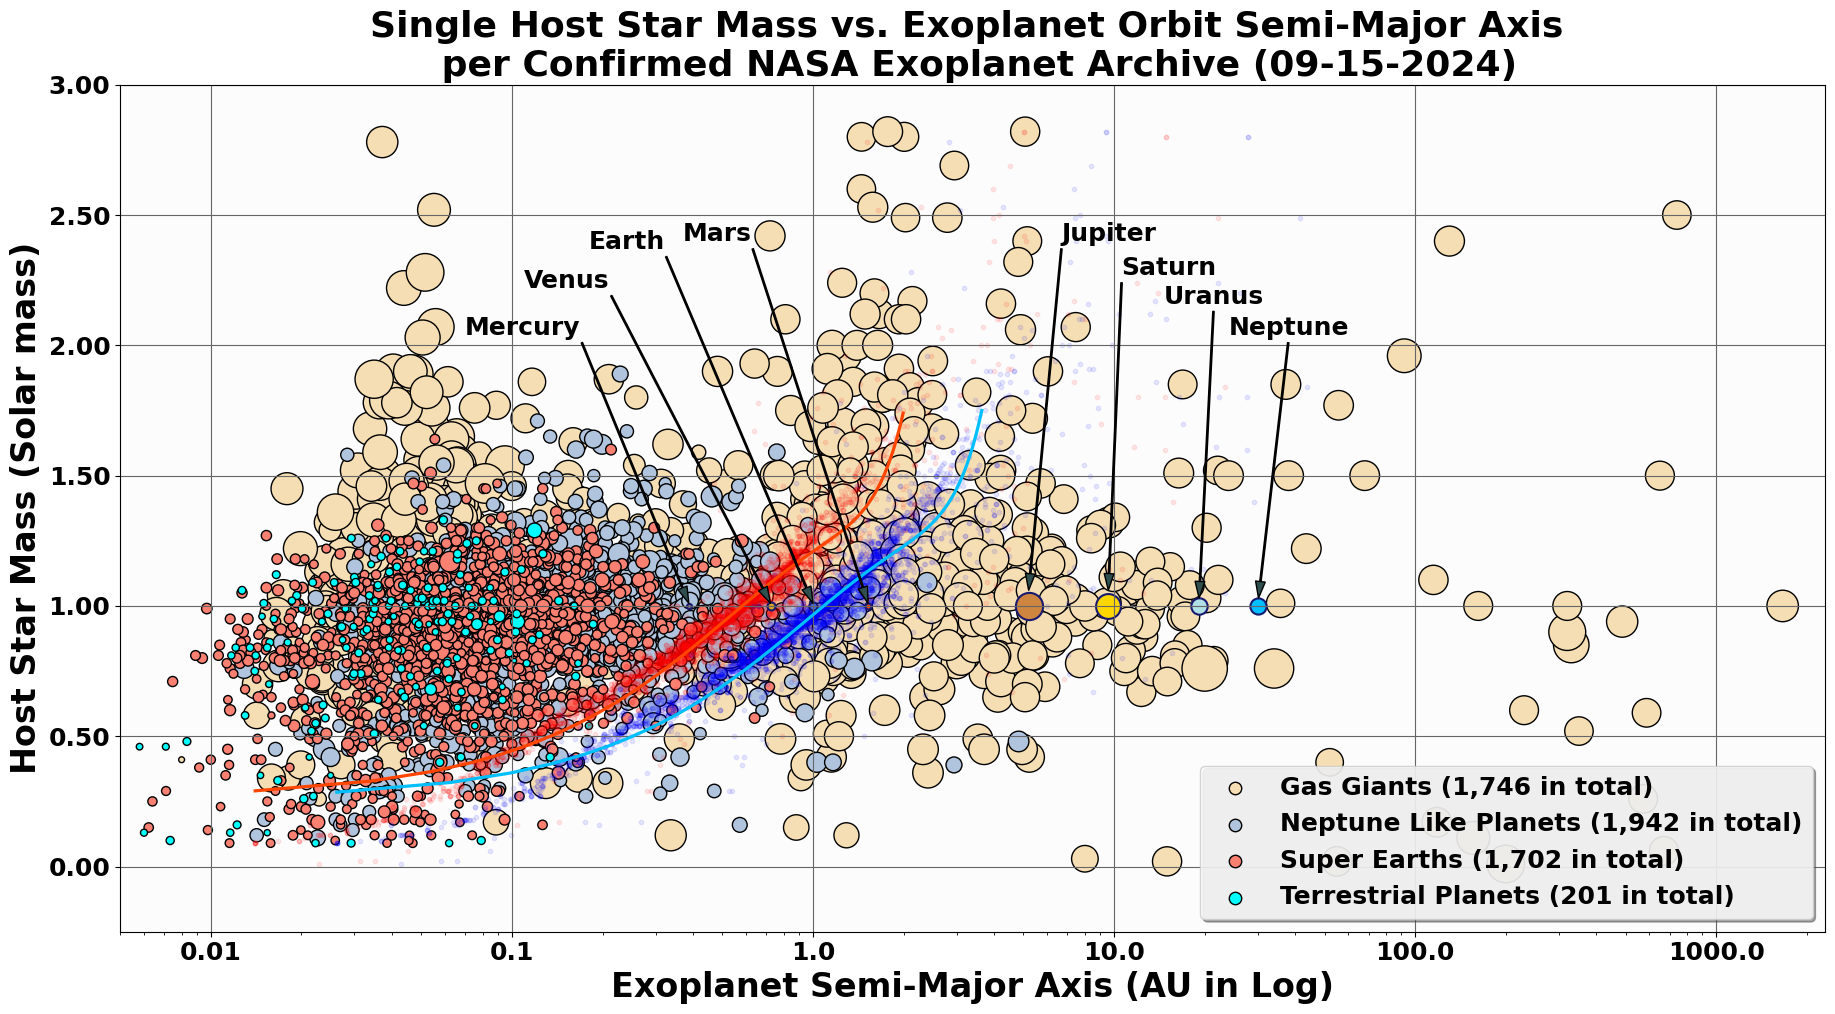

In [530]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 2300)
ax.set_ylim(-0.25, 3)
ax.grid(color='0.4')
ax.set_title('Single Host Star Mass vs. Exoplanet Orbit Semi-Major Axis \n per Confirmed NASA Exoplanet Archive (09-15-2024)', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

# Plot exoplanets
plot_exoplanets_with_size_and_label(ax=ax,
                                    exoplanets_data=exoplanets_plot_data,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    hz_status_field='pl_hz_status',
                                    scale_size=35,
                                    edgecolors='black',
                                    exoplanet_color_map=exoplanet_type_colors,
                                    exoplanet_label_map=exoplanet_type_labels)


# Plot habitable zone inner boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_plot_data,
                        x_field='hz_zone_inner',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_inner_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_inner_labels)

# Plot habitable zone outer boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_plot_data,
                        x_field='hz_zone_outer',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_outer_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_outer_labels)


# Plot Solar system planets
plot_exoplanets_with_size_only(ax=ax,
                               exoplanets_data=solar_system_planets_data,
                               x_field='pl_orbsmax',
                               y_field='st_mass',
                               size_field='pl_rade',
                               type_field='pl_type',
                               hz_status_field='pl_hz_status',
                               scale_size=35,
                               edgecolors='midnightblue',
                               linewidths=1.5,
                               exoplanet_color_map=solar_system_planets_colors,
                               exoplanet_label_map=solar_system_planets_labels)

# Labels for indicating Solar system planets
ax.annotate('Mercury', xy=(0.387, 1.01), xytext=(0.07, 2.04),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Venus', xy=(0.723, 1.01), xytext=(0.11, 2.22),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Earth', xy=(1.0, 1.01), xytext=(0.18, 2.37),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Mars', xy=(1.524, 1.01), xytext=(0.37, 2.40),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Jupiter', xy=(5.204, 1.06), xytext=(6.7, 2.40),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Saturn', xy=(9.573, 1.06), xytext=(10.6, 2.27),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Uranus', xy=(19.165, 1.03), xytext=(14.6, 2.16),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Neptune', xy=(30.178, 1.03), xytext=(23.96, 2.04),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))


# Fit the habitable zone inner boundary with curve
hz_inner_curve_fit_data = hz_zone_plot_data.loc[
    (hz_zone_plot_data['hz_zone_inner'] >= 0.01) & (hz_zone_plot_data['hz_zone_inner'] <= 2)]
hz_inner_fit_curve_x, hz_inner_fit_curve_y, hz_inner_poly_coefs = fit_curve(curve_fit_data=hz_inner_curve_fit_data,
                                                                            x_filed='hz_zone_inner',
                                                                            y_field='st_mass',
                                                                            degree=3,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_inner_fit_curve_x, hz_inner_fit_curve_y, color='orangered', linewidth=2.3)

# Fit the habitable zone outer boundary with curve
hz_outer_curve_fit_data = hz_zone_plot_data.loc[
    (hz_zone_plot_data['hz_zone_outer'] >= 0.01) & (hz_zone_plot_data['hz_zone_outer'] <= 3.7)]
hz_outer_fit_curve_x, hz_outer_fit_curve_y, hz_outer_poly_coefs = fit_curve(curve_fit_data=hz_outer_curve_fit_data,
                                                                            x_filed='hz_zone_outer',
                                                                            y_field='st_mass',
                                                                            degree=3,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_outer_fit_curve_x, hz_outer_fit_curve_y, color='deepskyblue', linewidth=2.3)


ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='lower right',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.85,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [531]:
exoplanets_plot_data['hostname'].value_counts()

,count
hostname,
KOI-351,8
TRAPPIST-1,7
HD 34445,6
HD 191939,6
TOI-178,6
...,...
Kepler-1252,1
Kepler-1253,1
Kepler-1255,1


In [532]:
print(exoplanets_plot_data['hostname'].unique())

['11 UMi' '14 And' '14 Her' ... 'tau Gem' 'ups Leo' 'xi Aql']


In [533]:
# Count number of planets per planets types for each stellar
def count_num_planet_per_types(exoplanet_data):
    stellar_system_pl_type_count = exoplanet_data.value_counts(['hostname', 'pl_type']).reset_index(name='pl_type_count')
    stellar_system_pl_type_stats = pd.DataFrame(stellar_system_pl_type_count['hostname'].unique(),
                                                    columns = ['hostname'])

    stellar_system_terrestrial_pl_count = stellar_system_pl_type_count.loc[(stellar_system_pl_type_count['pl_type'] == 'Terrestrial')]
    stellar_system_pl_type_stats = pd.merge(stellar_system_pl_type_stats,
                                            stellar_system_terrestrial_pl_count[['pl_type_count']],
                                            how="left",
                                            left_on=stellar_system_pl_type_stats['hostname'].str.lower(),
                                            right_on=stellar_system_terrestrial_pl_count['hostname'].str.lower())
    stellar_system_pl_type_stats.columns = ['key',
                                            'hostname',
                                            'terrestrial_pl_count']
    stellar_system_pl_type_stats = stellar_system_pl_type_stats.drop(['key'], axis = 1)

    stellar_system_super_earth_pl_count = stellar_system_pl_type_count.loc[(stellar_system_pl_type_count['pl_type'] == 'Super-Earth')]
    stellar_system_pl_type_stats = pd.merge(stellar_system_pl_type_stats,
                                            stellar_system_super_earth_pl_count[['pl_type_count']],
                                            how="left",
                                            left_on=stellar_system_pl_type_stats['hostname'].str.lower(),
                                            right_on=stellar_system_super_earth_pl_count['hostname'].str.lower())
    stellar_system_pl_type_stats.columns = ['key',
                                            'hostname',
                                            'terrestrial_pl_count',
                                            'super_earth_pl_count']
    stellar_system_pl_type_stats = stellar_system_pl_type_stats.drop(['key'], axis = 1)

    stellar_system_neptune_like_pl_count = stellar_system_pl_type_count.loc[(stellar_system_pl_type_count['pl_type'] == 'Neptune-Like')]
    stellar_system_pl_type_stats = pd.merge(stellar_system_pl_type_stats,
                                            stellar_system_neptune_like_pl_count[['pl_type_count']],
                                            how="left",
                                            left_on=stellar_system_pl_type_stats['hostname'].str.lower(),
                                            right_on=stellar_system_neptune_like_pl_count['hostname'].str.lower())
    stellar_system_pl_type_stats.columns = ['key',
                                            'hostname',
                                            'terrestrial_pl_count',
                                            'super_earth_pl_count',
                                            'neptune_like_pl_count']
    stellar_system_pl_type_stats = stellar_system_pl_type_stats.drop(['key'], axis = 1)

    stellar_system_gas_giant_pl_count = stellar_system_pl_type_count.loc[(stellar_system_pl_type_count['pl_type'] == 'Gas-Giant')]
    stellar_system_pl_type_stats = pd.merge(stellar_system_pl_type_stats,
                                            stellar_system_gas_giant_pl_count[['pl_type_count']],
                                            how="left",
                                            left_on=stellar_system_pl_type_stats['hostname'].str.lower(),
                                            right_on=stellar_system_gas_giant_pl_count['hostname'].str.lower())
    stellar_system_pl_type_stats.columns = ['key',
                                            'hostname',
                                            'terrestrial_pl_count',
                                            'super_earth_pl_count',
                                            'neptune_like_pl_count',
                                            'gas_giant_pl_count']
    stellar_system_pl_type_stats = stellar_system_pl_type_stats.drop(['key'], axis = 1)
    stellar_system_pl_type_stats.fillna(0, inplace=True)
    return stellar_system_pl_type_stats

stellar_system_pl_type_stats = count_num_planet_per_types(exoplanets_plot_data)
print(stellar_system_pl_type_stats)

         hostname  terrestrial_pl_count  super_earth_pl_count  \
0        TOI-1136                   0.0                   0.0   
1       Kepler-11                   1.0                   0.0   
2        HD 10180                   0.0                   0.0   
3       Kepler-55                   0.0                   5.0   
4       Kepler-82                   0.0                   1.0   
...           ...                   ...                   ...   
3441   Kepler-123                   0.0                   1.0   
3442  Kepler-1230                   0.0                   0.0   
3443  Kepler-1231                   0.0                   1.0   
3444  Kepler-1232                   0.0                   1.0   
3445       YSES 2                   0.0                   0.0   

      neptune_like_pl_count  gas_giant_pl_count  
0                       6.0                 0.0  
1                       5.0                 0.0  
2                       5.0                 1.0  
3                  

In [534]:
def classify_stellar_systems(stellar_data):
    stellar_data['st_system_class'] = 'N/A'

    # Class 1 stellar system: at least one Terrestrial + at least one Neptune-Like or Gas-Giant
    stellar_data.loc[
        (stellar_data['terrestrial_pl_count'] > 0)
            & ((stellar_data['neptune_like_pl_count'] > 0) | (stellar_data['gas_giant_pl_count'] > 0)),
        'st_system_class'] = 'Class 1'

    # Class 2 stellar system: no Terrestrial, at least one Super-Earth + at least one Neptune-Like or Gas-Giant
    stellar_data.loc[
        ((stellar_data['terrestrial_pl_count'] == 0) & (stellar_data['super_earth_pl_count'] > 0))
            & ((stellar_data['neptune_like_pl_count'] > 0) | (stellar_data['gas_giant_pl_count'] > 0)),
        'st_system_class'] = 'Class 2'

    # Class 3 stellar system: only Terrestrial or Super-Earth
    stellar_data.loc[
        ((stellar_data['terrestrial_pl_count'] > 0) | (stellar_data['super_earth_pl_count'] > 0))
            & ((stellar_data['neptune_like_pl_count'] == 0) & (stellar_data['gas_giant_pl_count'] == 0)),
        'st_system_class'] = 'Class 3'

    # Class 4 stellar system: only Neptune-Like or Gas-Giant
    stellar_data.loc[
        ((stellar_data['terrestrial_pl_count'] == 0) & (stellar_data['super_earth_pl_count'] == 0))
            & ((stellar_data['neptune_like_pl_count'] > 0) | (stellar_data['gas_giant_pl_count'] > 0)),
        'st_system_class'] = 'Class 4'

    stellar_data['st_system_class'].value_counts().sort_index()

classify_stellar_systems(stellar_system_pl_type_stats)
print(stellar_system_pl_type_stats)

         hostname  terrestrial_pl_count  super_earth_pl_count  \
0        TOI-1136                   0.0                   0.0   
1       Kepler-11                   1.0                   0.0   
2        HD 10180                   0.0                   0.0   
3       Kepler-55                   0.0                   5.0   
4       Kepler-82                   0.0                   1.0   
...           ...                   ...                   ...   
3441   Kepler-123                   0.0                   1.0   
3442  Kepler-1230                   0.0                   0.0   
3443  Kepler-1231                   0.0                   1.0   
3444  Kepler-1232                   0.0                   1.0   
3445       YSES 2                   0.0                   0.0   

      neptune_like_pl_count  gas_giant_pl_count st_system_class  
0                       6.0                 0.0         Class 4  
1                       5.0                 0.0         Class 1  
2                    

In [535]:
stellar_spectral_type_count = exoplanets_plot_data.value_counts(['hostname', 'st_spectype_short']).reset_index(name='st_spectype_short_count')

stellar_system_pl_type_stats = pd.merge(stellar_system_pl_type_stats,
                           stellar_spectral_type_count[['st_spectype_short']],
                           how="left",
                           left_on=stellar_system_pl_type_stats['hostname'].str.lower(),
                           right_on=stellar_spectral_type_count['hostname'].str.lower())
stellar_system_pl_type_stats = stellar_system_pl_type_stats.drop(['key_0'], axis = 1)
stellar_system_pl_type_stats.loc[(stellar_system_pl_type_stats['st_spectype_short'] == 'N'), 'st_spectype_short'] = np.nan
stellar_system_pl_type_stats = stellar_system_pl_type_stats.loc[(stellar_system_pl_type_stats['st_spectype_short'] != 'T')]
stellar_system_pl_type_stats.info()
stellar_system_pl_type_stats

<class 'pandas.core.frame.DataFrame'>
Index: 3445 entries, 0 to 3445
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hostname               3445 non-null   object 
 1   terrestrial_pl_count   3445 non-null   float64
 2   super_earth_pl_count   3445 non-null   float64
 3   neptune_like_pl_count  3445 non-null   float64
 4   gas_giant_pl_count     3445 non-null   float64
 5   st_system_class        3445 non-null   object 
 6   st_spectype_short      1103 non-null   object 
dtypes: float64(4), object(3)
memory usage: 215.3+ KB


,hostname,terrestrial_pl_count,super_earth_pl_count,neptune_like_pl_count,gas_giant_pl_count,st_system_class,st_spectype_short
0,TOI-1136,0.0,0.0,6.0,0.0,Class 4,NaN
1,Kepler-11,1.0,0.0,5.0,0.0,Class 1,NaN
2,HD 10180,0.0,0.0,5.0,1.0,Class 4,G
3,Kepler-55,0.0,5.0,0.0,0.0,Class 3,NaN
4,Kepler-82,0.0,1.0,4.0,0.0,Class 2,NaN
...,...,...,...,...,...,...,...
3441,Kepler-123,0.0,1.0,0.0,1.0,Class 2,NaN
3442,Kepler-1230,0.0,0.0,1.0,0.0,Class 4,NaN
3443,Kepler-1231,0.0,1.0,0.0,0.0,Class 3,NaN
3444,Kepler-1232,0.0,1.0,0.0,0.0,Class 3,NaN


In [536]:
stellar_system_pl_type_stats.to_csv(
    '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/StellarSystemClassies-NASA-HWC.csv'
)

,count
st_spectype_short,
G,395
K,303
M,231
F,161
A,11
B,2


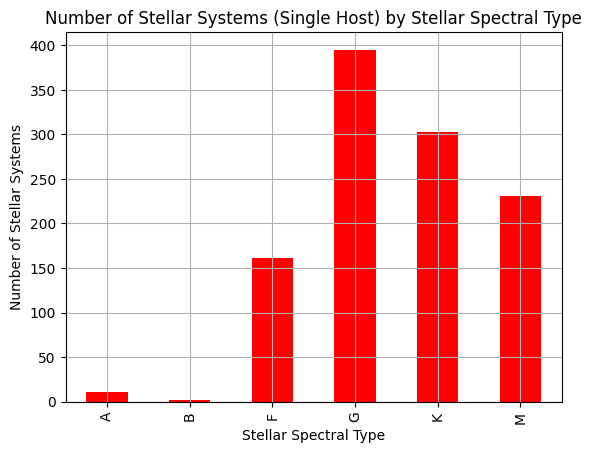

In [537]:
stellar_system_pl_type_stats['st_spectype_short'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Stellar Spectral Type',
    ylabel='Number of Stellar Systems',
    title='Number of Stellar Systems (Single Host) by Stellar Spectral Type',
    grid=True)

stellar_system_pl_type_stats['st_spectype_short'].value_counts()

,count
st_system_class,
Class 1,18
Class 2,286
Class 3,997
Class 4,2144


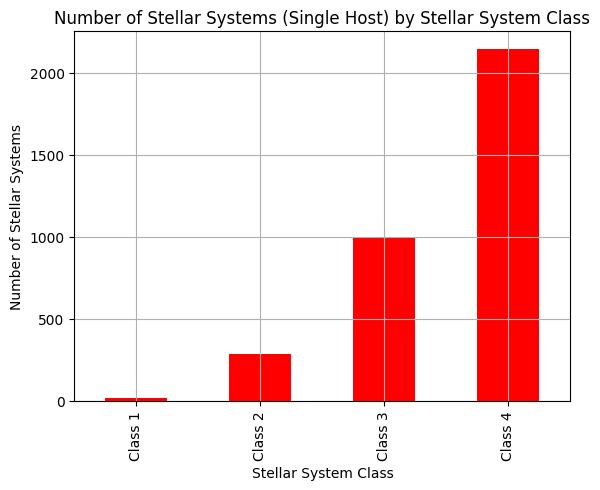

In [609]:
stellar_system_pl_type_stats['st_system_class'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Stellar System Class',
    ylabel='Number of Stellar Systems',
    title='Number of Stellar Systems (Single Host) by Stellar System Class',
    grid=True)

stellar_system_pl_type_stats['st_system_class'].value_counts().sort_index()

In [610]:
stellar_system_class_type_percent = pd.DataFrame(stellar_system_pl_type_stats['st_system_class'].value_counts().reset_index().values,
                                                 columns=['st_system_class', 'st_system_class_percent'])
total = stellar_system_class_type_percent['st_system_class_percent'].sum()
stellar_system_class_type_percent['st_system_class_percent'] = stellar_system_class_type_percent['st_system_class_percent'] / total

stellar_system_class_type_percent

,st_system_class,st_system_class_percent
0,Class 4,0.622351
1,Class 3,0.289405
2,Class 2,0.083019
3,Class 1,0.005225


In [539]:
exoplanets_plot_data = pd.merge(exoplanets_plot_data,
                                stellar_system_pl_type_stats[['st_system_class']],
                                how="left",
                                left_on=exoplanets_plot_data['hostname'].str.lower(),
                                right_on=stellar_system_pl_type_stats['hostname'].str.lower())
exoplanets_plot_data = exoplanets_plot_data.drop(['key_0'], axis = 1)

In [540]:
exoplanets_plot_data.to_csv(
    '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/StellarSystemClassification/StellarSystemData-NASA-HWC.csv'
)

,count
st_spectype_short,
M,10
K,1


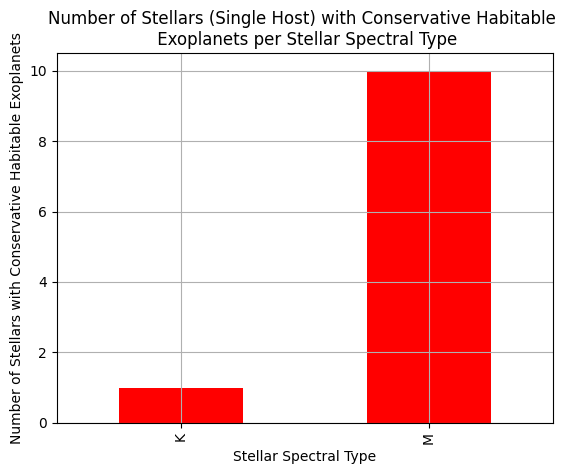

In [558]:
exoplanet_hz_p1_data = exoplanets_plot_data.loc[(~np.isnan(exoplanets_plot_data['P_HABITABLE']))
                                                & (exoplanets_plot_data['P_HABITABLE'] == 1)]
hz_zone_p1_data = hz_zone_plot_data.loc[(~np.isnan(hz_zone_plot_data['P_HABITABLE']))
                                        & (hz_zone_plot_data['P_HABITABLE'] == 1)]

stellar_spectral_type_count_hz_p1 = exoplanet_hz_p1_data.value_counts(
    ['hostname', 'st_spectype_short']).reset_index(name='st_spectype_short_count')

stellar_spectral_type_count_hz_p1['st_spectype_short'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Stellar Spectral Type',
    ylabel='Number of Stellars with Conservative Habitable Exoplanets',
    title='Number of Stellars (Single Host) with Conservative Habitable \n Exoplanets per Stellar Spectral Type',
    grid=True)

stellar_spectral_type_count_hz_p1['st_spectype_short'].value_counts()

In [562]:
stellar_spectral_type_count_hz_p1[['hostname', 'st_spectype_short']]

,hostname,st_spectype_short
0,GJ 1002,M
1,GJ 1061,M
2,TOI-700,M
3,Teegarden's Star,M
4,GJ 273,M
5,K2-3,M
6,Kepler-62,K
7,LP 890-9,M
8,Ross 128,M
9,TOI-715,M


,count
st_system_class,
Class 3,15
Class 1,2


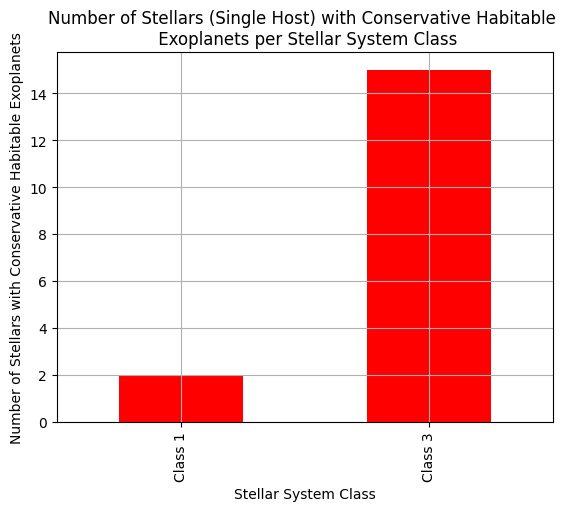

In [564]:
stellar_system_class_count_hz_p1 = exoplanet_hz_p1_data.value_counts(
    ['hostname', 'st_system_class']).reset_index(name='st_system_class_count')

stellar_system_class_count_hz_p1['st_system_class'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Stellar System Class',
    ylabel='Number of Stellars with Conservative Habitable Exoplanets',
    title='Number of Stellars (Single Host) with Conservative Habitable \n Exoplanets per Stellar System Class',
    grid=True)

stellar_system_class_count_hz_p1['st_system_class'].value_counts()

In [606]:
stellar_system_class_percentage_hz_p1 = pd.DataFrame(stellar_system_class_count_hz_p1['st_system_class'].value_counts().reset_index().values,
                                                     columns=['st_system_class', 'st_system_class_percent'])
total = stellar_system_class_percentage_hz_p1['st_system_class_percent'].sum()
stellar_system_class_percentage_hz_p1['st_system_class_percent'] = stellar_system_class_percentage_hz_p1['st_system_class_percent'] / total

stellar_system_class_percentage_hz_p1

,st_system_class,st_system_class_percent
0,Class 3,0.882353
1,Class 1,0.117647


In [543]:
exoplanet_hz_p1_data['pl_orbsmax'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,pl_orbsmax
count,24.000000
mean,0.125420
std,0.156986
min,0.022270
25%,0.044085
50%,0.066050
75%,0.141325
90%,0.270840
95%,0.392740
99%,0.646930


In [544]:
exoplanet_hz_p1_data['st_mass'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,st_mass
count,24.000000
mean,0.255000
std,0.189576
min,0.090000
25%,0.115000
50%,0.170000
75%,0.405000
90%,0.547000
95%,0.601000
99%,0.671600


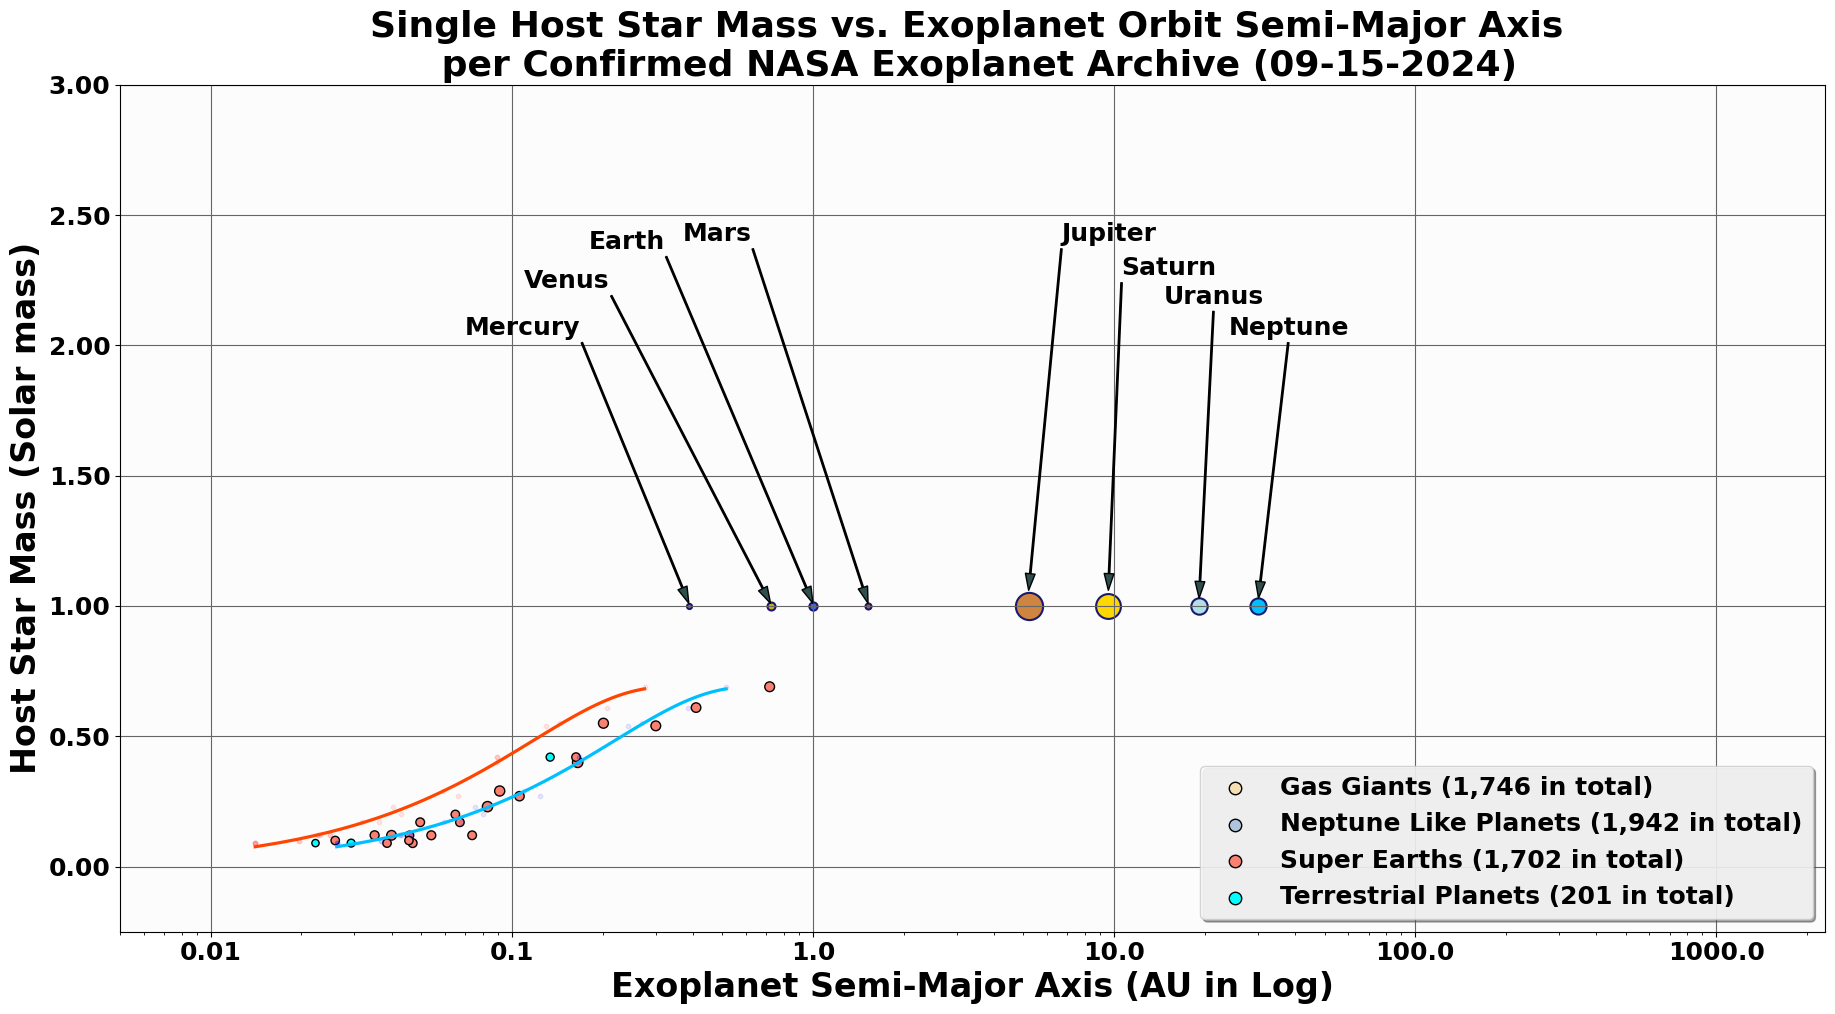

In [545]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 2300)
ax.set_ylim(-0.25, 3)
ax.grid(color='0.4')
ax.set_title('Single Host Star Mass vs. Exoplanet Orbit Semi-Major Axis \n per Confirmed NASA Exoplanet Archive (09-15-2024)', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

# Plot exoplanets
plot_exoplanets_with_size_and_label(ax=ax,
                                    exoplanets_data=exoplanet_hz_p1_data,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    hz_status_field='pl_hz_status',
                                    scale_size=35,
                                    edgecolors='black',
                                    exoplanet_color_map=exoplanet_type_colors,
                                    exoplanet_label_map=exoplanet_type_labels)


# Plot habitable zone inner boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_p1_data,
                        x_field='hz_zone_inner',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_inner_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_inner_labels)

# Plot habitable zone outer boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_p1_data,
                        x_field='hz_zone_outer',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_outer_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_outer_labels)


# Plot Solar system planets
plot_exoplanets_with_size_only(ax=ax,
                               exoplanets_data=solar_system_planets_data,
                               x_field='pl_orbsmax',
                               y_field='st_mass',
                               size_field='pl_rade',
                               type_field='pl_type',
                               hz_status_field='pl_hz_status',
                               scale_size=35,
                               edgecolors='midnightblue',
                               linewidths=1.5,
                               exoplanet_color_map=solar_system_planets_colors,
                               exoplanet_label_map=solar_system_planets_labels)

# Labels for indicating Solar system planets
ax.annotate('Mercury', xy=(0.387, 1.01), xytext=(0.07, 2.04),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Venus', xy=(0.723, 1.01), xytext=(0.11, 2.22),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Earth', xy=(1.0, 1.01), xytext=(0.18, 2.37),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Mars', xy=(1.524, 1.01), xytext=(0.37, 2.40),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Jupiter', xy=(5.204, 1.06), xytext=(6.7, 2.40),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Saturn', xy=(9.573, 1.06), xytext=(10.6, 2.27),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Uranus', xy=(19.165, 1.03), xytext=(14.6, 2.16),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Neptune', xy=(30.178, 1.03), xytext=(23.96, 2.04),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))


# Fit the habitable zone inner boundary with curve
hz_inner_curve_fit_data = hz_zone_p1_data.loc[
    (hz_zone_p1_data['hz_zone_inner'] >= 0.01) & (hz_zone_p1_data['hz_zone_inner'] <= 2)]
hz_inner_fit_curve_x, hz_inner_fit_curve_y, hz_inner_poly_coefs = fit_curve(curve_fit_data=hz_inner_curve_fit_data,
                                                                            x_filed='hz_zone_inner',
                                                                            y_field='st_mass',
                                                                            degree=3,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_inner_fit_curve_x, hz_inner_fit_curve_y, color='orangered', linewidth=2.3)

# Fit the habitable zone outer boundary with curve
hz_outer_curve_fit_data = hz_zone_p1_data.loc[
    (hz_zone_p1_data['hz_zone_outer'] >= 0.01) & (hz_zone_p1_data['hz_zone_outer'] <= 3.7)]
hz_outer_fit_curve_x, hz_outer_fit_curve_y, hz_outer_poly_coefs = fit_curve(curve_fit_data=hz_outer_curve_fit_data,
                                                                            x_filed='hz_zone_outer',
                                                                            y_field='st_mass',
                                                                            degree=3,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_outer_fit_curve_x, hz_outer_fit_curve_y, color='deepskyblue', linewidth=2.3)


ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='lower right',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.85,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

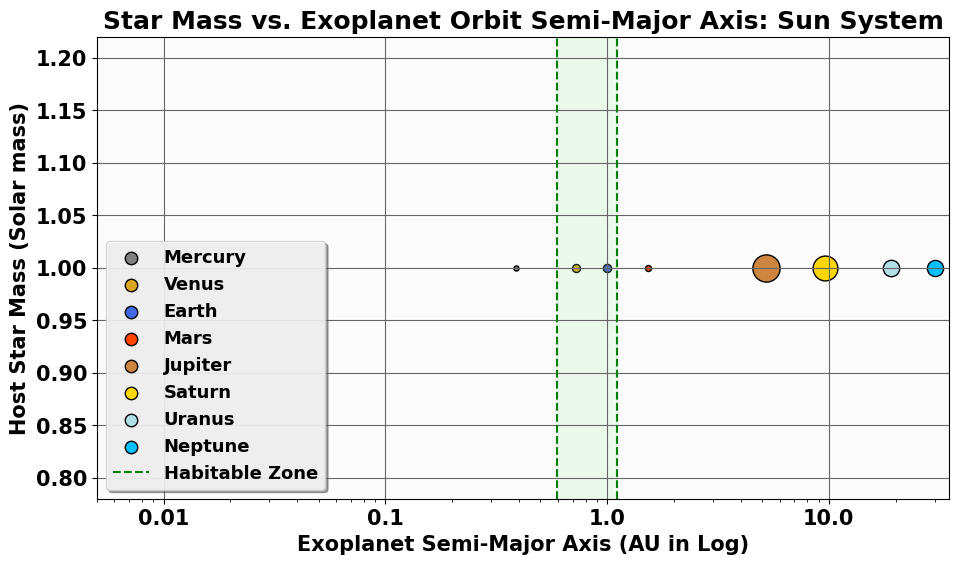

In [546]:
# Plot Solar System
host_star_names = ['Sun']
plot_stellar_systems_in_grid(plot_data=solar_system_planets_data,
                             host_star_names=host_star_names,
                             figsize_width=11,
                             figsize_height=6,
                             grid_rows=1,
                             grid_columns=1,
                             subplot_xlim_min=0.005,
                             subplot_xlim_max=35,
                             subplot_ylim_min=0.78,
                             subplot_ylim_max=1.22,
                             exoplanet_color_map=solar_system_planets_colors,
                             exoplanet_label_map=solar_system_planets_labels,
                             legend_loc='lower left')

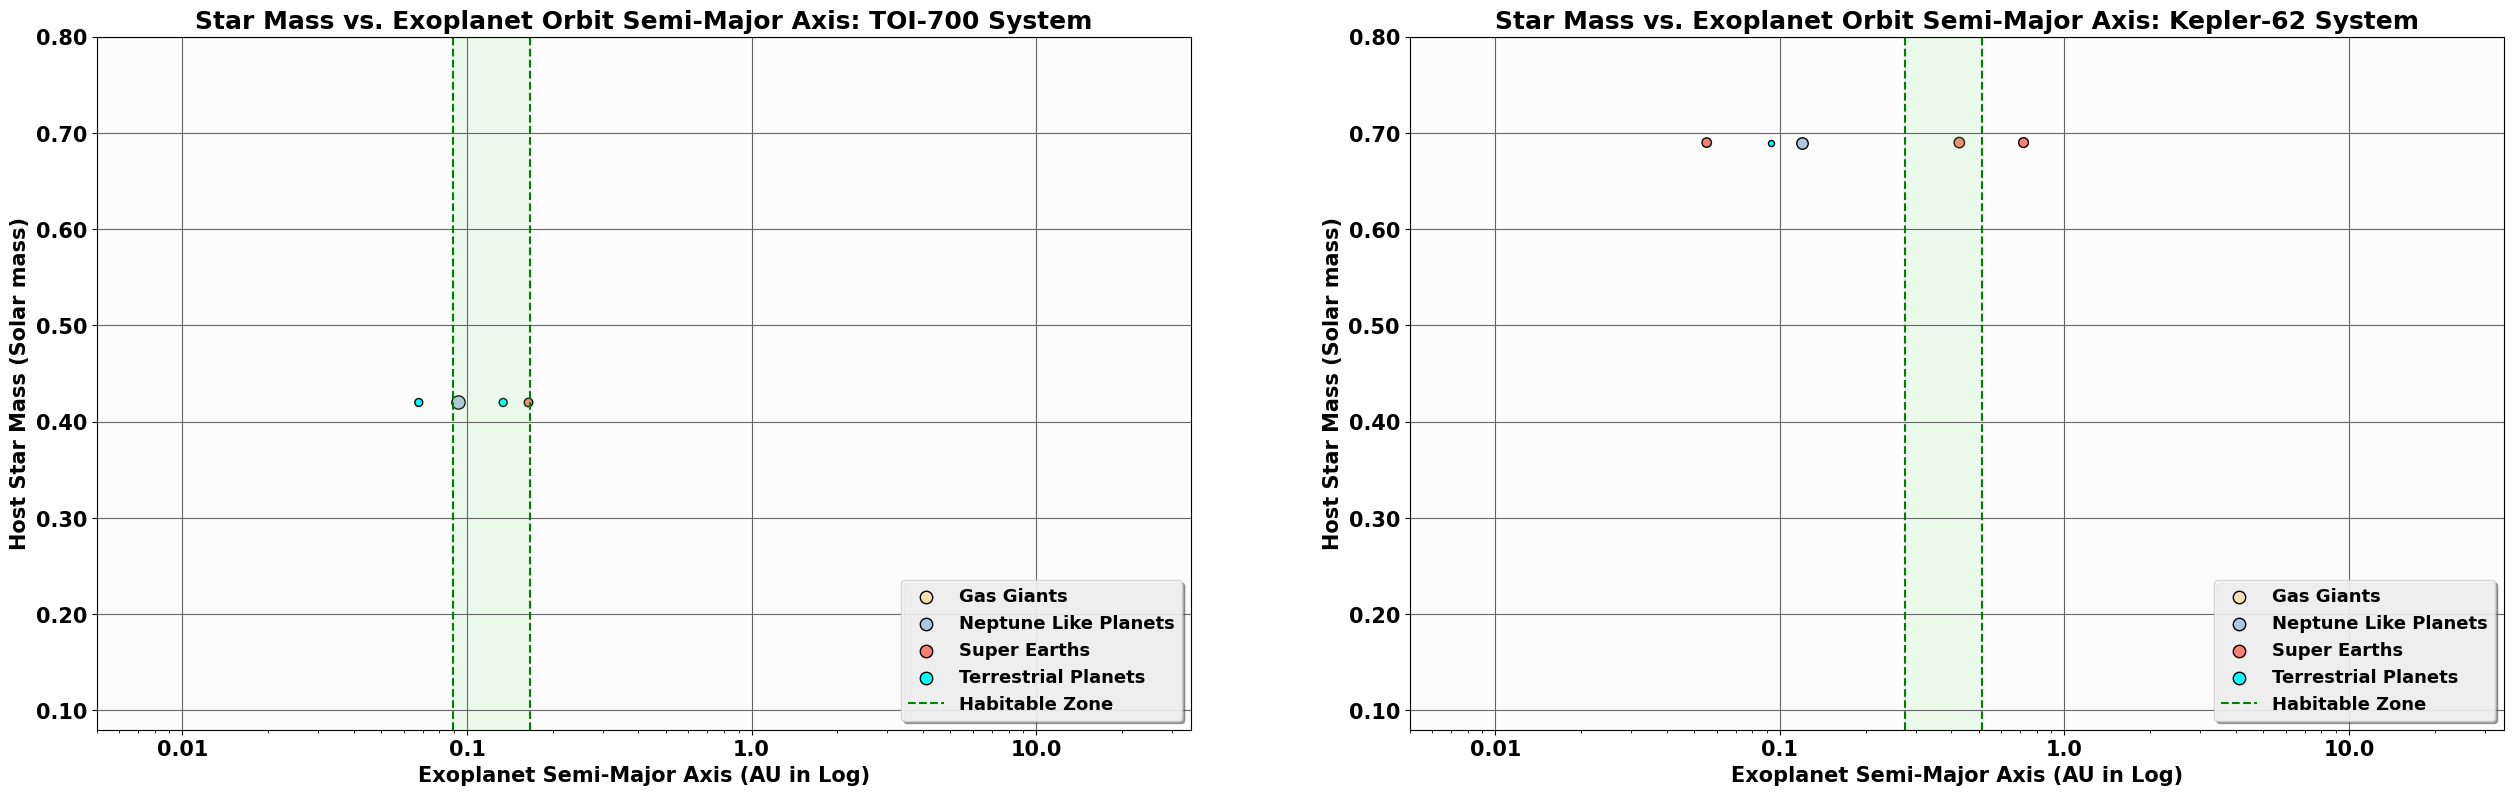

In [547]:
# Plot class 1 stellar systems that contain conservative habitable exoplanets
host_star_names = stellar_system_class_count_hz_p1.loc[(stellar_system_class_count_hz_p1['st_system_class'] == 'Class 1')]['hostname'].to_numpy()
plot_stellar_systems_in_grid(plot_data=exoplanets_plot_data,
                             host_star_names=host_star_names,
                             figsize_width=48,
                             figsize_height=9,
                             grid_rows=1,
                             grid_columns=3,
                             subplot_xlim_min=0.005,
                             subplot_xlim_max=35,
                             subplot_ylim_min=0.08,
                             subplot_ylim_max=0.8,
                             exoplanet_color_map=exoplanet_type_colors,
                             exoplanet_label_map=stellar_system_exoplanet_type_labels)

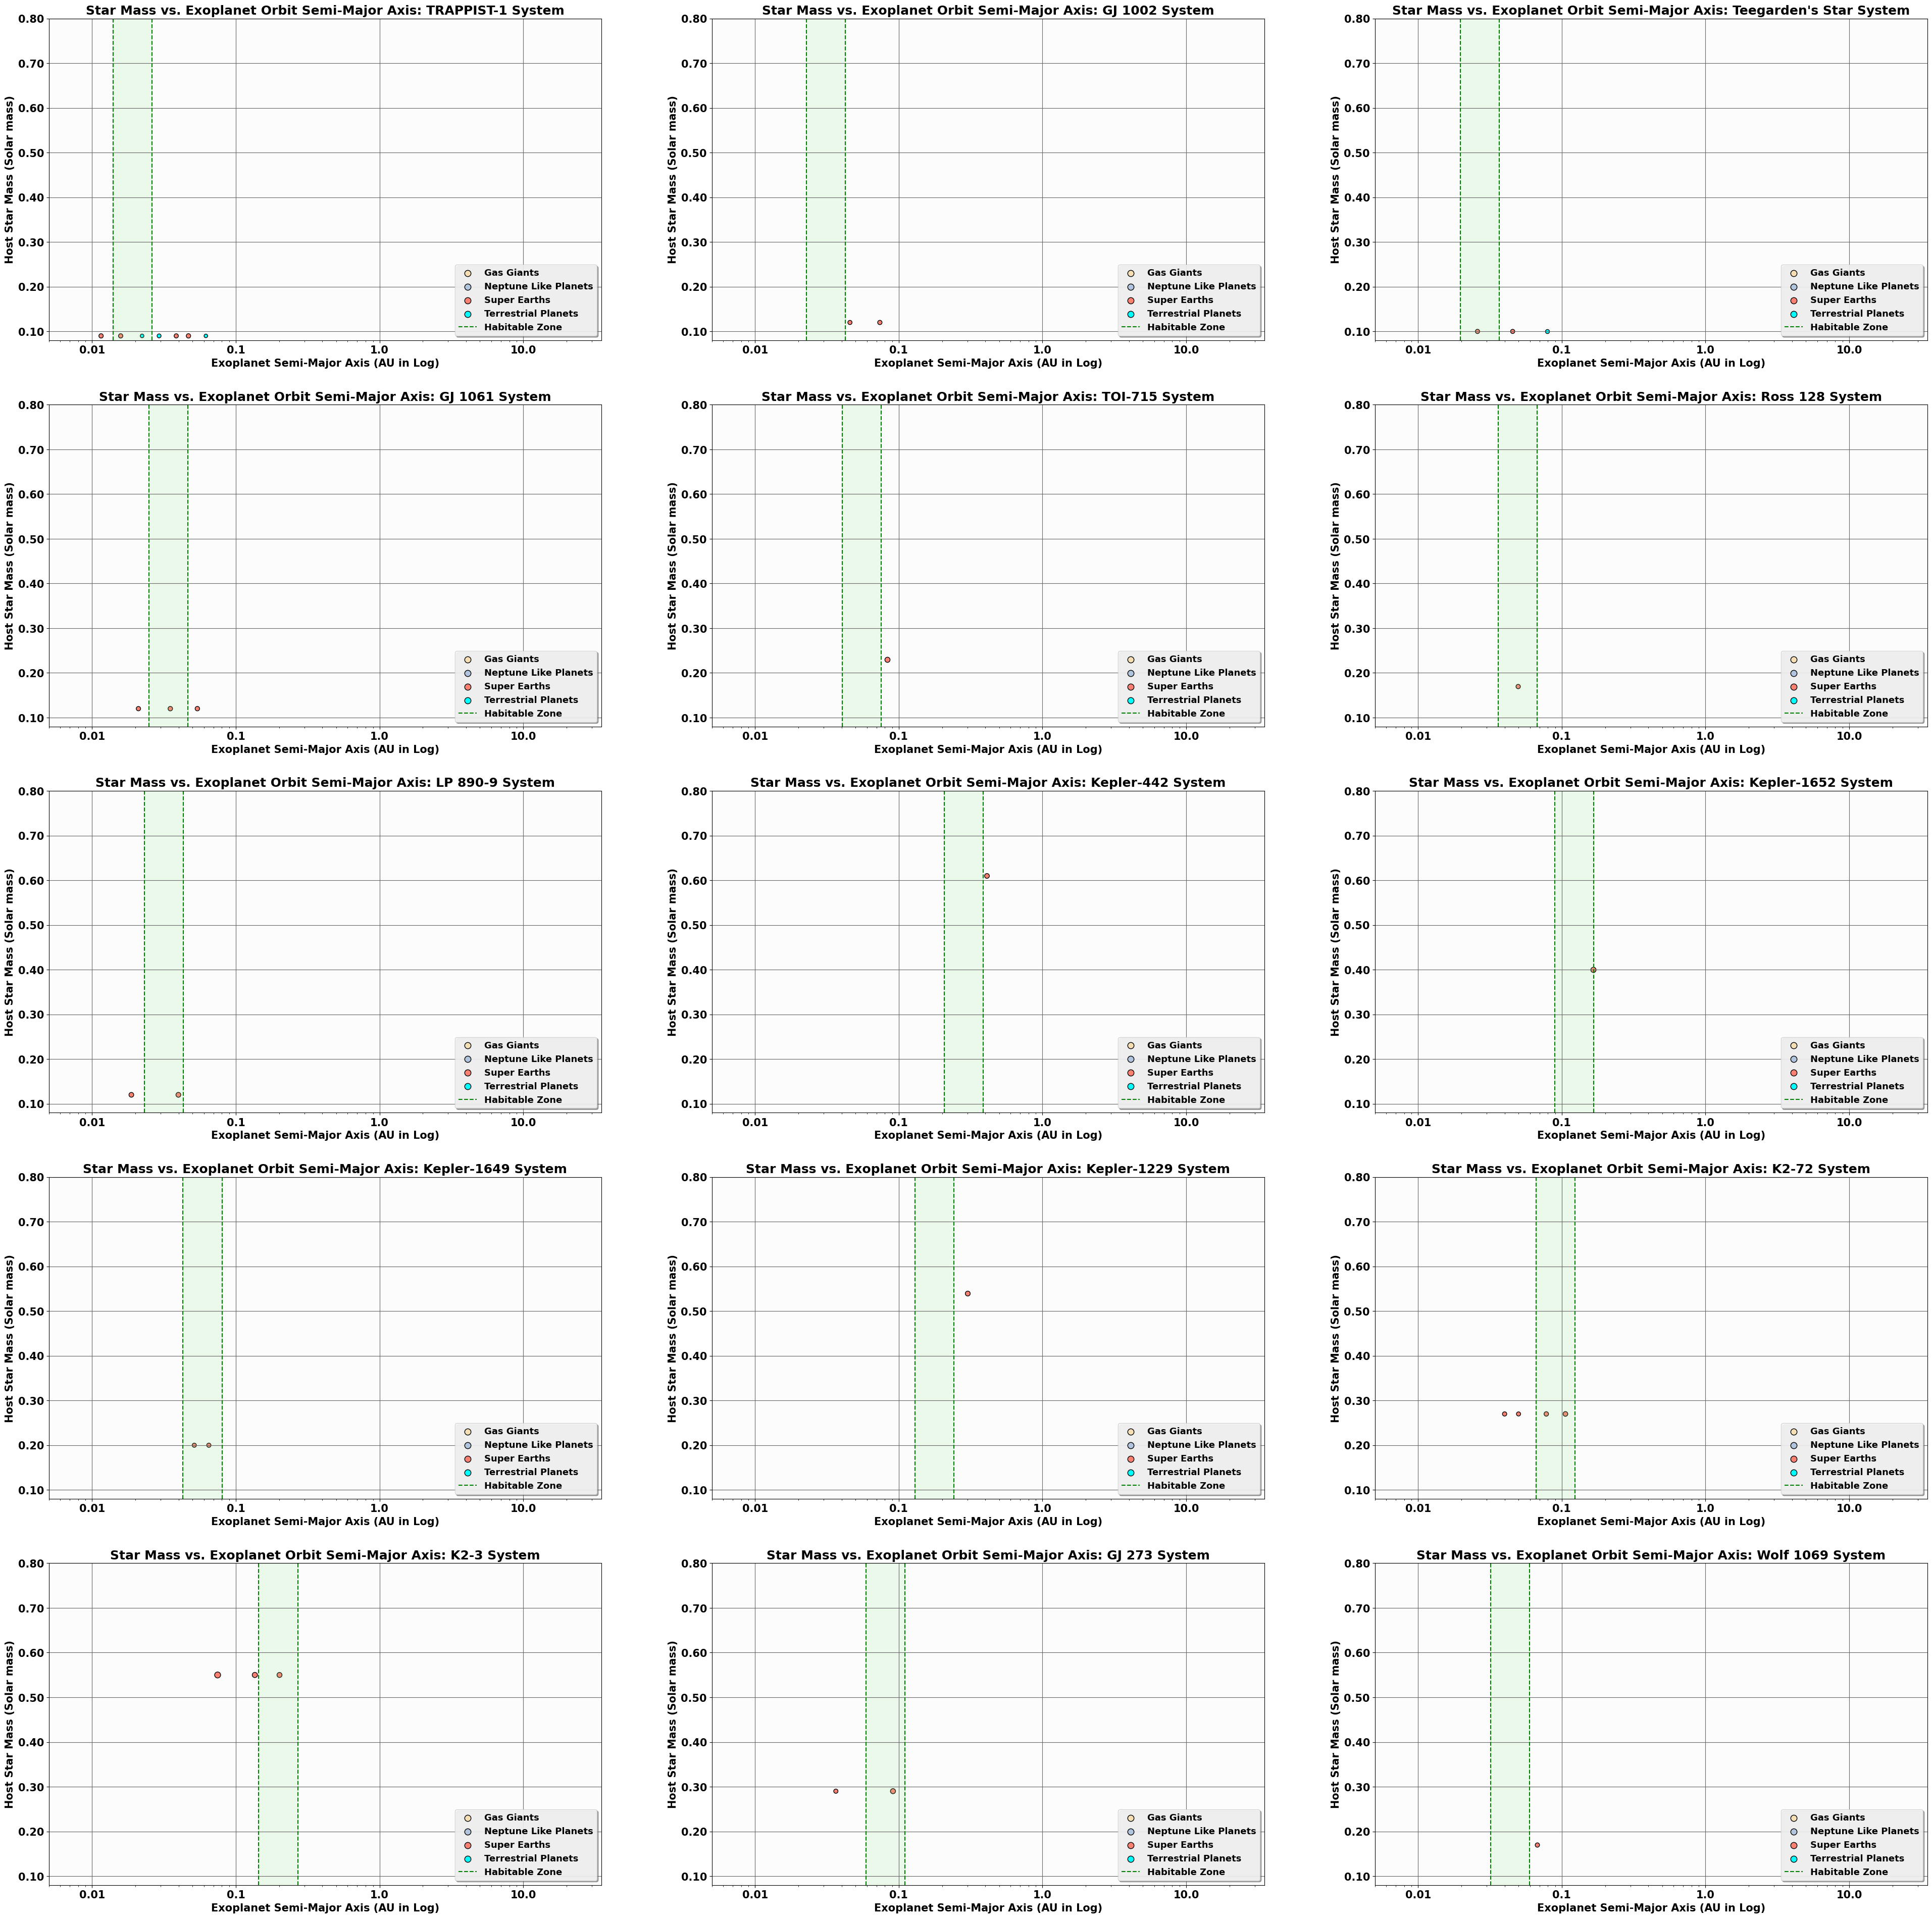

In [548]:
# Plot class 3 stellar systems that contain optimistic habitable exoplanets
host_star_names = stellar_system_class_count_hz_p1.loc[(stellar_system_class_count_hz_p1['st_system_class'] == 'Class 3')]['hostname'].to_numpy()
plot_stellar_systems_in_grid(plot_data=exoplanets_plot_data,
                             host_star_names=host_star_names,
                             figsize_width=48,
                             figsize_height=48,
                             grid_rows=5,
                             grid_columns=3,
                             subplot_xlim_min=0.005,
                             subplot_xlim_max=35,
                             subplot_ylim_min=0.08,
                             subplot_ylim_max=0.8,
                             exoplanet_color_map=exoplanet_type_colors,
                             exoplanet_label_map=stellar_system_exoplanet_type_labels)

,count
st_spectype_short,
M,15
K,2
G,1


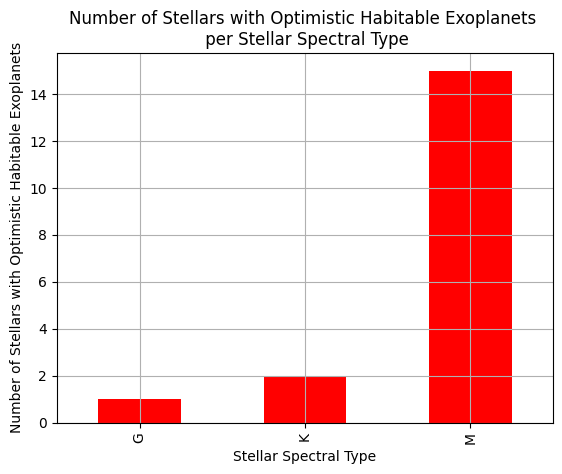

In [565]:
exoplanet_hz_p2_data = exoplanets_plot_data.loc[(~np.isnan(exoplanets_plot_data['P_HABITABLE']))
                                                & (exoplanets_plot_data['P_HABITABLE'] == 2)]
hz_zone_p2_data = hz_zone_plot_data.loc[(~np.isnan(hz_zone_plot_data['P_HABITABLE']))
                                        & (hz_zone_plot_data['P_HABITABLE'] == 2)]

stellar_spectral_type_count_hz_p2 = exoplanet_hz_p2_data.value_counts(
    ['hostname', 'st_spectype_short']).reset_index(name='st_spectype_short_count')

stellar_spectral_type_count_hz_p2['st_spectype_short'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Stellar Spectral Type',
    ylabel='Number of Stellars with Optimistic Habitable Exoplanets',
    title='Number of Stellars with Optimistic Habitable Exoplanets \n per Stellar Spectral Type',
    grid=True)

stellar_spectral_type_count_hz_p2['st_spectype_short'].value_counts()

In [566]:
stellar_spectral_type_count_hz_p2[['hostname', 'st_spectype_short']]

,hostname,st_spectype_short
0,GJ 180,M
1,GJ 163,M
2,TOI-2257,M
3,Ross 508,M
4,LHS 1140,M
5,Kepler-62,K
6,Kepler-22,G
7,Kepler-155,M
8,K2-9,M
9,K2-18,M


,count
st_system_class,
Class 4,12
Class 3,9
Class 2,7
Class 1,1


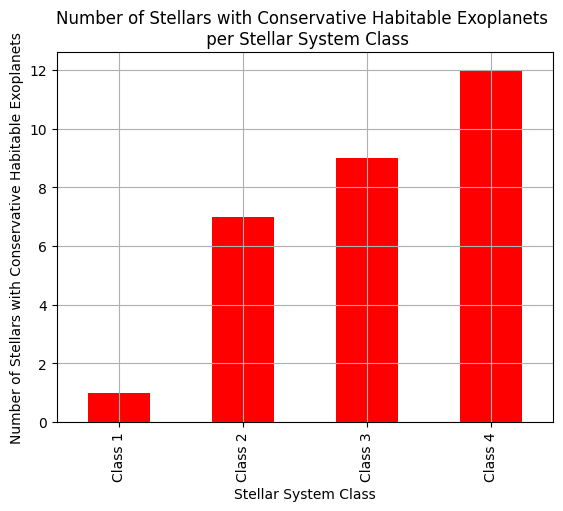

In [567]:
stellar_system_class_count_hz_p2 = exoplanet_hz_p2_data.value_counts(
    ['hostname', 'st_system_class']).reset_index(name='st_system_class_count')

stellar_system_class_count_hz_p2['st_system_class'].value_counts().sort_index().plot(
    kind='bar',
    color='red',
    xlabel='Stellar System Class',
    ylabel='Number of Stellars with Conservative Habitable Exoplanets',
    title='Number of Stellars with Conservative Habitable Exoplanets \n per Stellar System Class',
    grid=True)

stellar_system_class_count_hz_p2['st_system_class'].value_counts()

In [611]:
stellar_system_class_percentage_hz_p2 = pd.DataFrame(stellar_system_class_count_hz_p2['st_system_class'].value_counts().reset_index().values,
                                                     columns=['st_system_class', 'st_system_class_percent'])
total = stellar_system_class_percentage_hz_p2['st_system_class_percent'].sum()
stellar_system_class_percentage_hz_p2['st_system_class_percent'] = stellar_system_class_percentage_hz_p2['st_system_class_percent'] / total

stellar_system_class_percentage_hz_p2

,st_system_class,st_system_class_percent
0,Class 4,0.413793
1,Class 3,0.310345
2,Class 2,0.241379
3,Class 1,0.034483


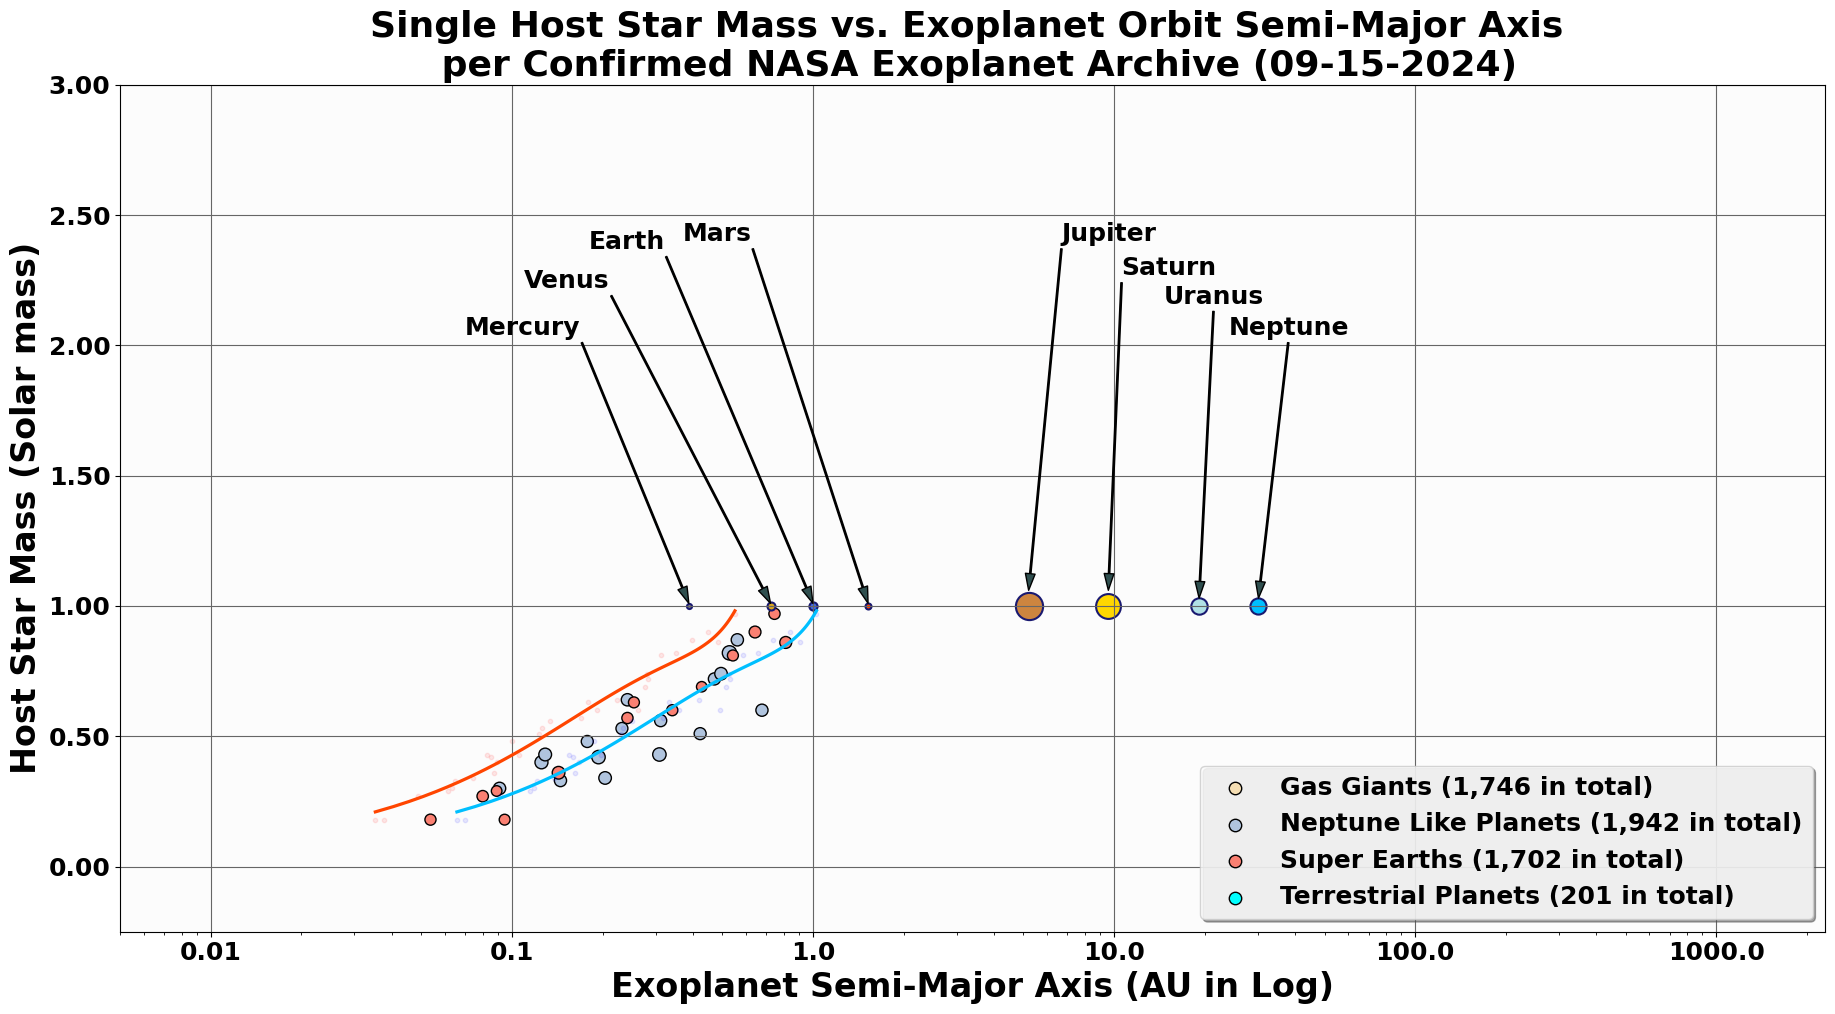

In [568]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 2300)
ax.set_ylim(-0.25, 3)
ax.grid(color='0.4')
ax.set_title('Single Host Star Mass vs. Exoplanet Orbit Semi-Major Axis \n per Confirmed NASA Exoplanet Archive (09-15-2024)', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet Semi-Major Axis (AU in Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Host Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

# Plot exoplanets
plot_exoplanets_with_size_and_label(ax=ax,
                                    exoplanets_data=exoplanet_hz_p2_data,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    hz_status_field='pl_hz_status',
                                    scale_size=35,
                                    edgecolors='black',
                                    exoplanet_color_map=exoplanet_type_colors,
                                    exoplanet_label_map=exoplanet_type_labels)


# Plot habitable zone inner boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_p2_data,
                        x_field='hz_zone_inner',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_inner_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_inner_labels)

# Plot habitable zone outer boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_p2_data,
                        x_field='hz_zone_outer',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_outer_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_outer_labels)


# Plot Solar system planets
plot_exoplanets_with_size_only(ax=ax,
                               exoplanets_data=solar_system_planets_data,
                               x_field='pl_orbsmax',
                               y_field='st_mass',
                               size_field='pl_rade',
                               type_field='pl_type',
                               hz_status_field='pl_hz_status',
                               scale_size=35,
                               edgecolors='midnightblue',
                               linewidths=1.5,
                               exoplanet_color_map=solar_system_planets_colors,
                               exoplanet_label_map=solar_system_planets_labels)

# Labels for indicating Solar system planets
ax.annotate('Mercury', xy=(0.387, 1.01), xytext=(0.07, 2.04),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Venus', xy=(0.723, 1.01), xytext=(0.11, 2.22),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Earth', xy=(1.0, 1.01), xytext=(0.18, 2.37),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Mars', xy=(1.524, 1.01), xytext=(0.37, 2.40),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Jupiter', xy=(5.204, 1.06), xytext=(6.7, 2.40),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Saturn', xy=(9.573, 1.06), xytext=(10.6, 2.27),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Uranus', xy=(19.165, 1.03), xytext=(14.6, 2.16),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Neptune', xy=(30.178, 1.03), xytext=(23.96, 2.04),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))


# Fit the habitable zone inner boundary with curve
hz_inner_curve_fit_data = hz_zone_p2_data.loc[
    (hz_zone_p2_data['hz_zone_inner'] >= 0.01) & (hz_zone_p2_data['hz_zone_inner'] <= 2)]
hz_inner_fit_curve_x, hz_inner_fit_curve_y, hz_inner_poly_coefs = fit_curve(curve_fit_data=hz_inner_curve_fit_data,
                                                                            x_filed='hz_zone_inner',
                                                                            y_field='st_mass',
                                                                            degree=3,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_inner_fit_curve_x, hz_inner_fit_curve_y, color='orangered', linewidth=2.3)

# Fit the habitable zone outer boundary with curve
hz_outer_curve_fit_data = hz_zone_p2_data.loc[
    (hz_zone_p2_data['hz_zone_outer'] >= 0.01) & (hz_zone_p2_data['hz_zone_outer'] <= 3.7)]
hz_outer_fit_curve_x, hz_outer_fit_curve_y, hz_outer_poly_coefs = fit_curve(curve_fit_data=hz_outer_curve_fit_data,
                                                                            x_filed='hz_zone_outer',
                                                                            y_field='st_mass',
                                                                            degree=3,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_outer_fit_curve_x, hz_outer_fit_curve_y, color='deepskyblue', linewidth=2.3)


ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='lower right',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.85,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

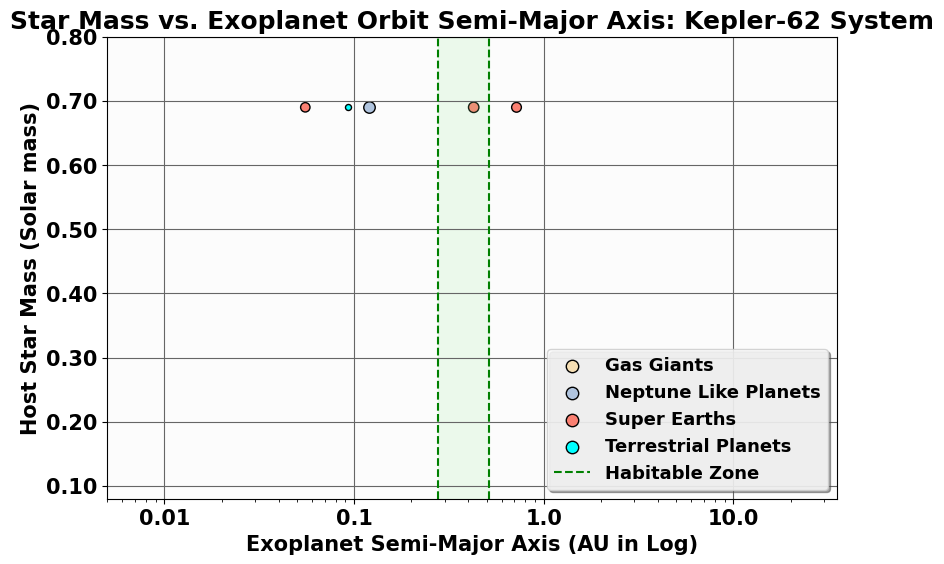

In [569]:
# Plot class 1 stellar systems that contain optimistic habitable exoplanets
host_star_names = stellar_system_class_count_hz_p2.loc[(stellar_system_class_count_hz_p2['st_system_class'] == 'Class 1')]['hostname'].to_numpy()
plot_stellar_systems_in_grid(plot_data=exoplanets_plot_data,
                             host_star_names=host_star_names,
                             figsize_width=32,
                             figsize_height=6,
                             grid_rows=1,
                             grid_columns=3,
                             subplot_xlim_min=0.005,
                             subplot_xlim_max=35,
                             subplot_ylim_min=0.08,
                             subplot_ylim_max=0.8,
                             exoplanet_color_map=exoplanet_type_colors,
                             exoplanet_label_map=stellar_system_exoplanet_type_labels)

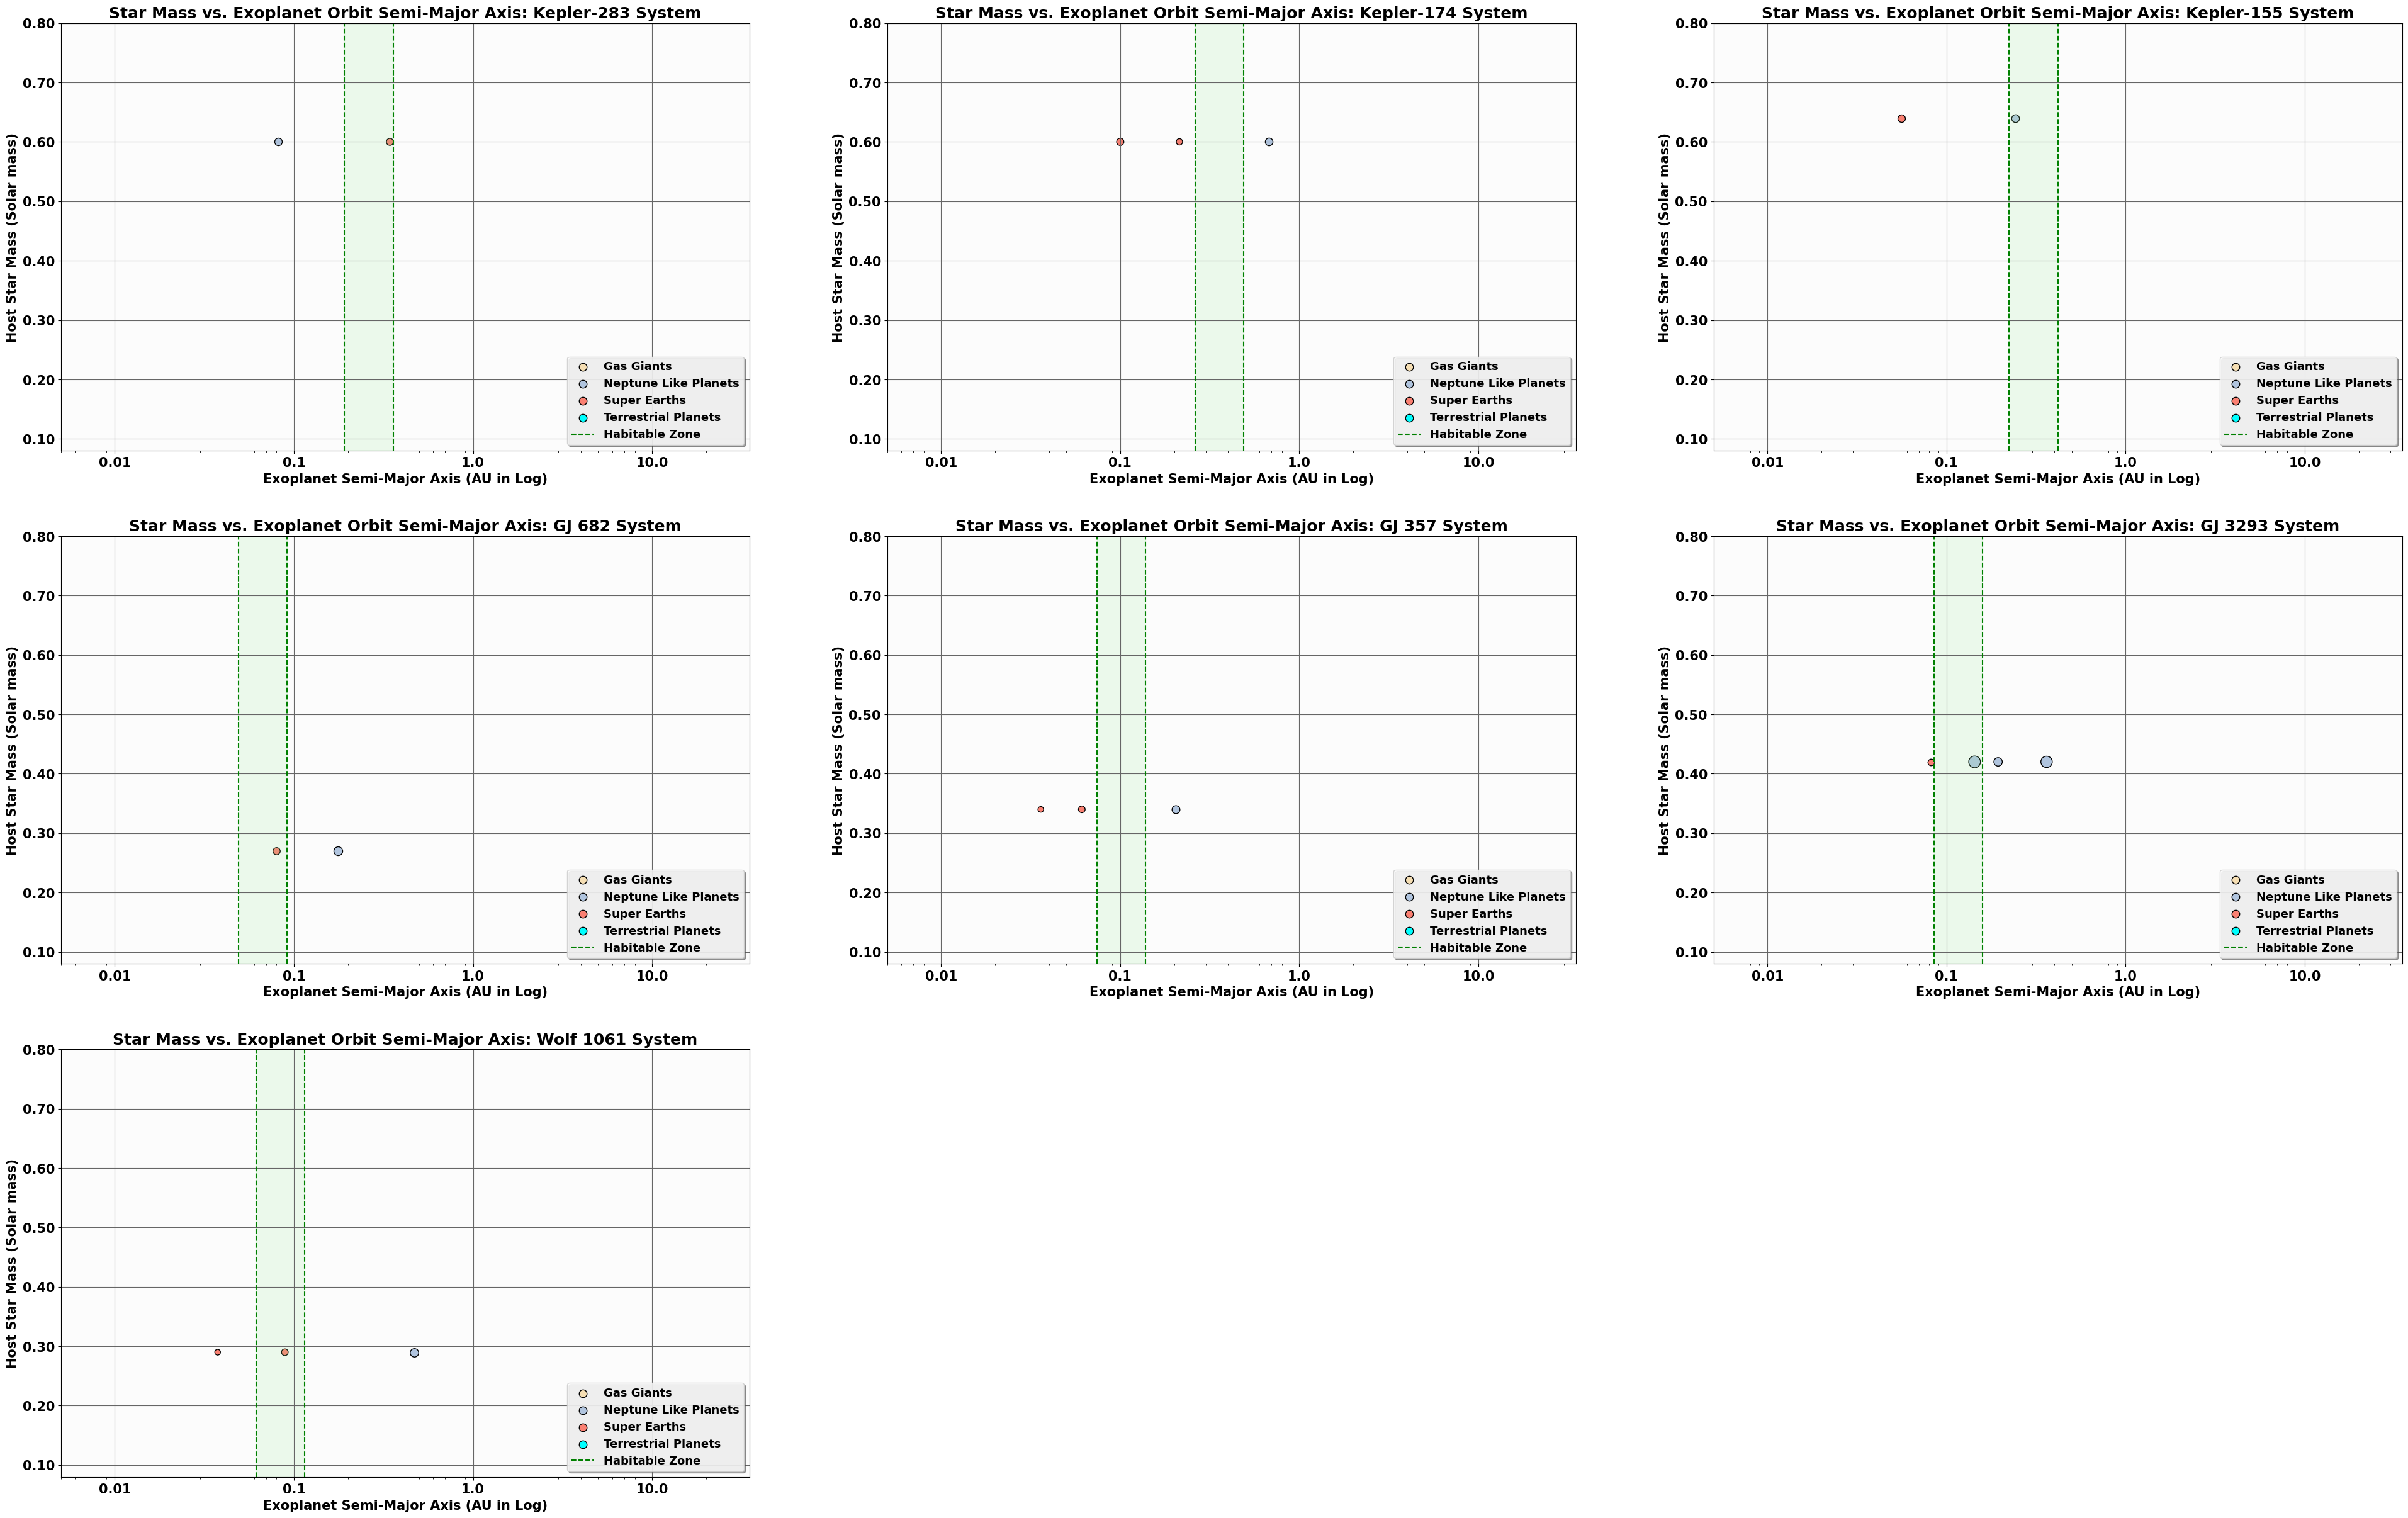

In [553]:
# Plot class 2 stellar systems that contain optimistic habitable exoplanets
host_star_names = stellar_system_class_count_hz_p2.loc[(stellar_system_class_count_hz_p2['st_system_class'] == 'Class 2')]['hostname'].to_numpy()
plot_stellar_systems_in_grid(plot_data=exoplanets_plot_data,
                             host_star_names=host_star_names,
                             figsize_width=48,
                             figsize_height=30,
                             grid_rows=3,
                             grid_columns=3,
                             subplot_xlim_min=0.005,
                             subplot_xlim_max=35,
                             subplot_ylim_min=0.08,
                             subplot_ylim_max=0.8,
                             exoplanet_color_map=exoplanet_type_colors,
                             exoplanet_label_map=stellar_system_exoplanet_type_labels)

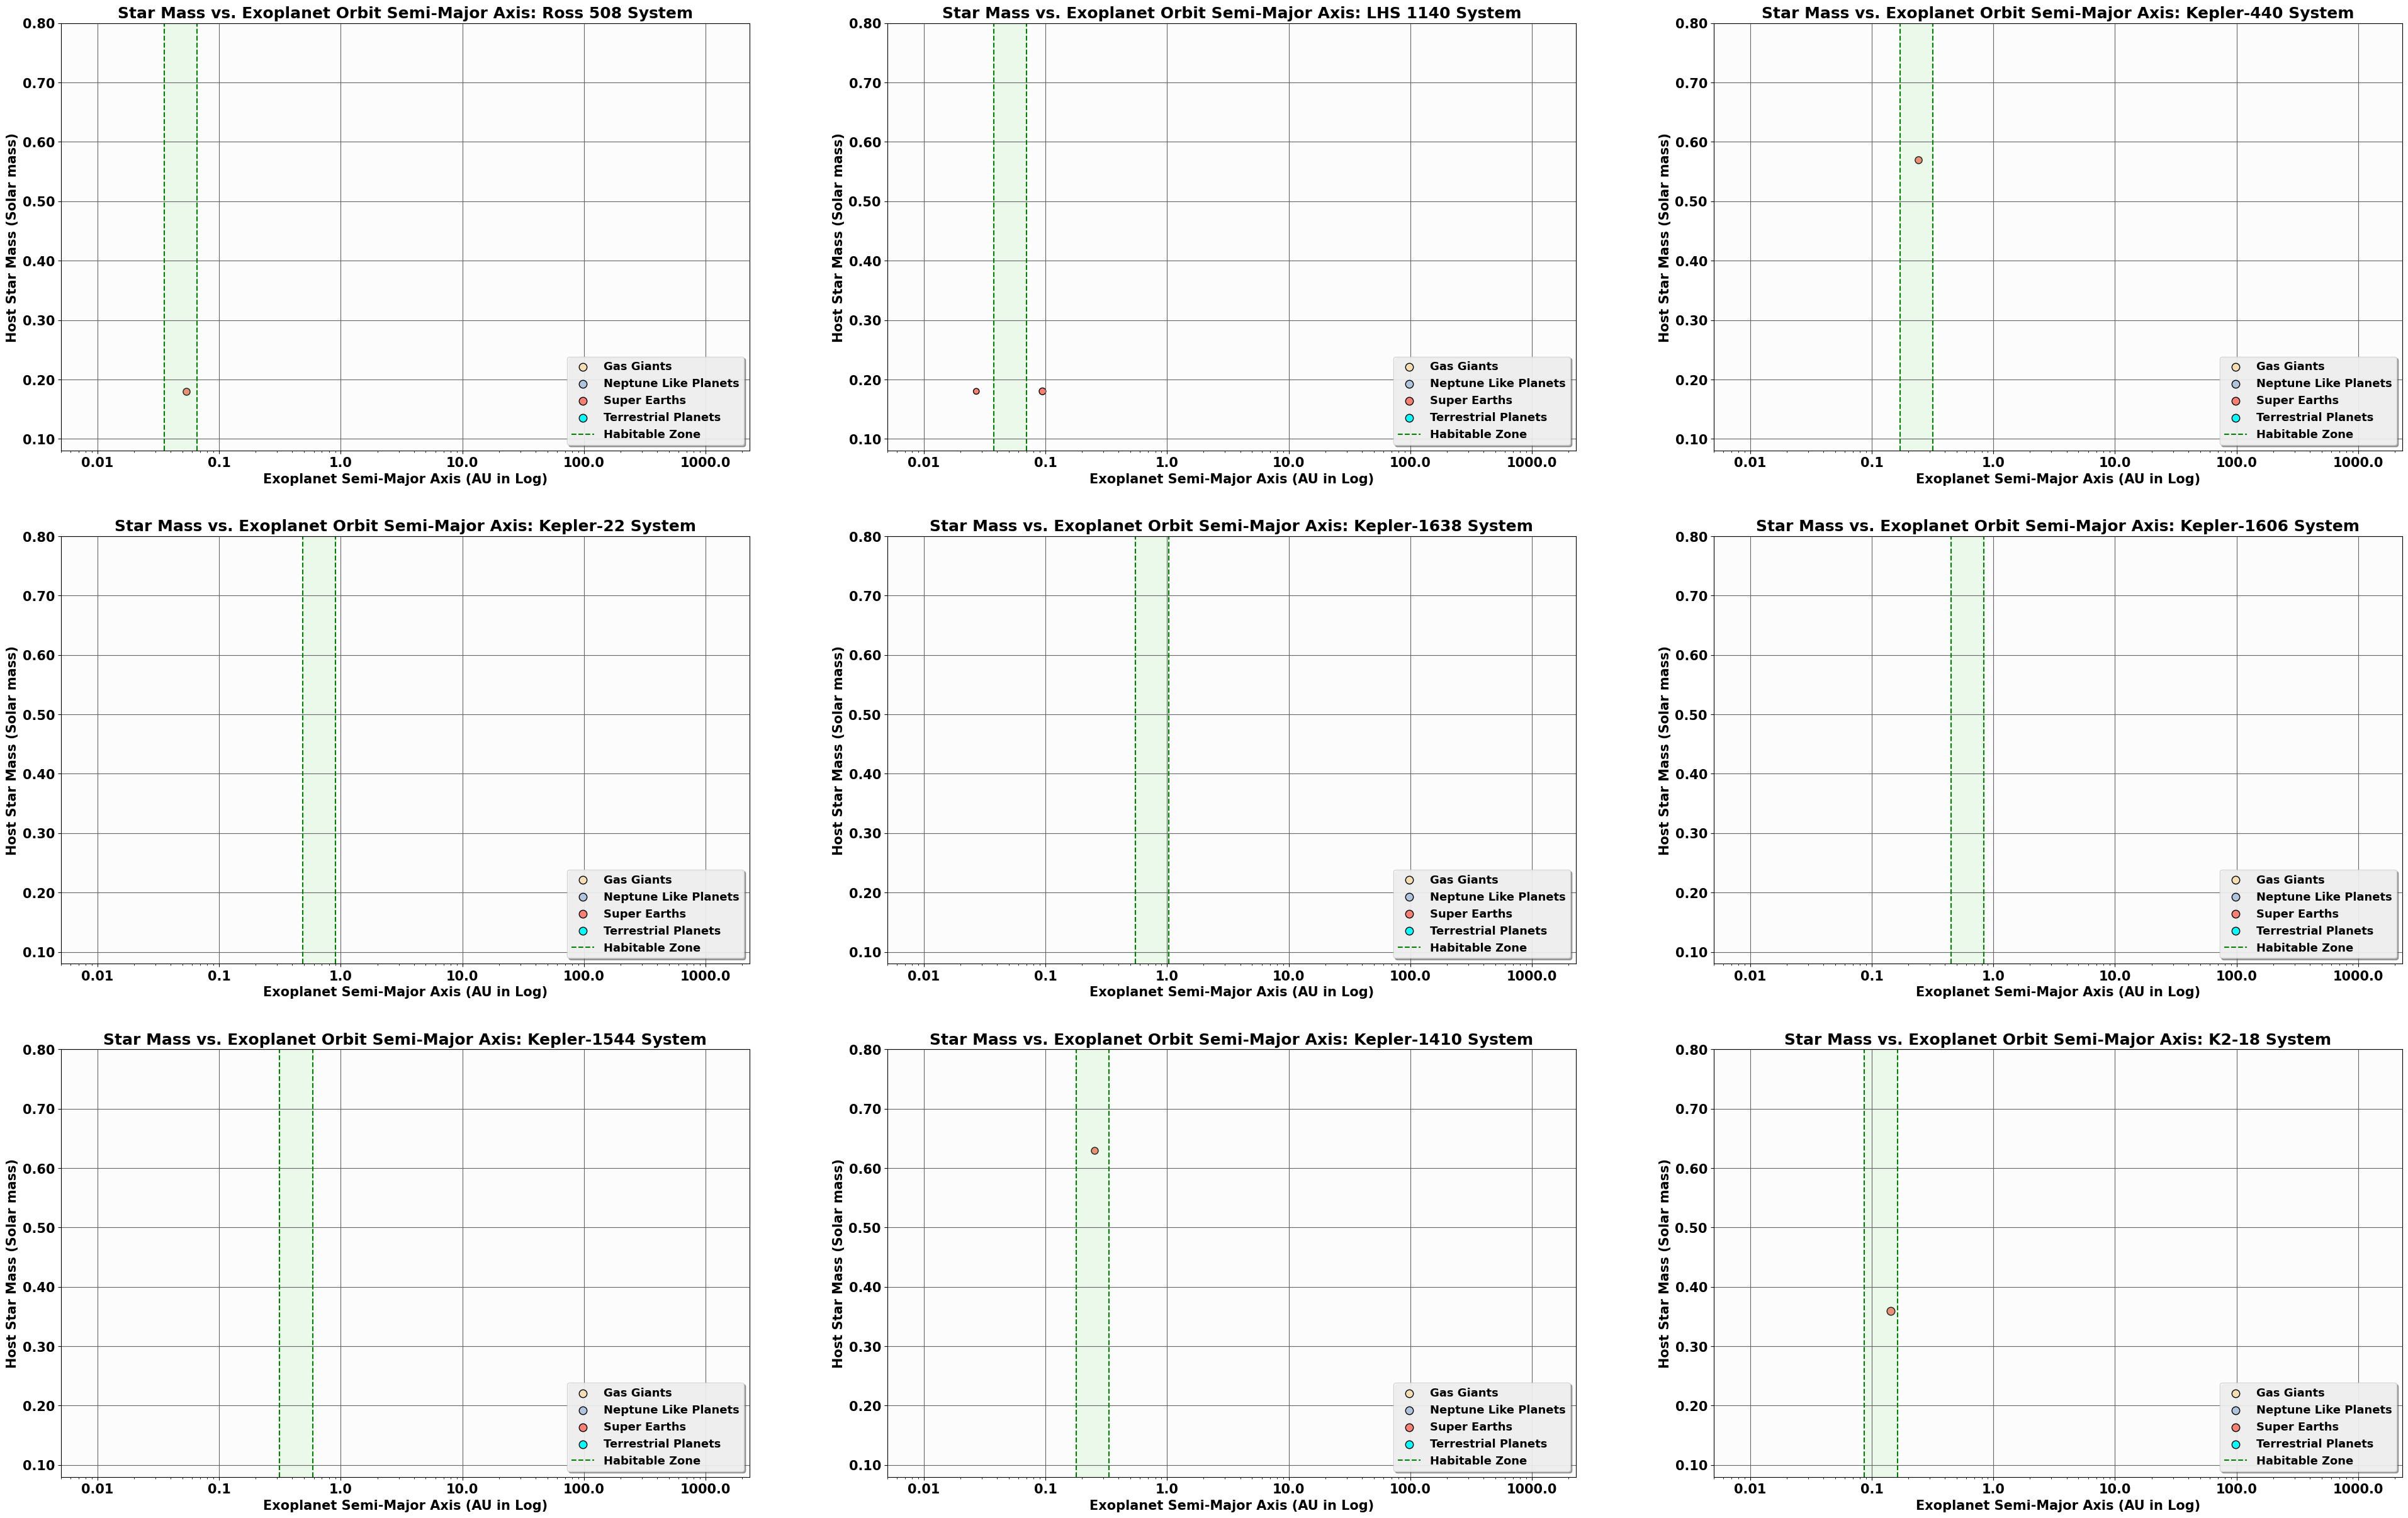

In [554]:
# Plot class 3 stellar systems that contain optimistic habitable exoplanets
host_star_names = stellar_system_class_count_hz_p2.loc[(stellar_system_class_count_hz_p2['st_system_class'] == 'Class 3')]['hostname'].to_numpy()
plot_stellar_systems_in_grid(plot_data=exoplanets_plot_data,
                             host_star_names=host_star_names,
                             figsize_width=48,
                             figsize_height=30,
                             grid_rows=3,
                             grid_columns=3,
                             subplot_xlim_min=0.005,
                             subplot_xlim_max=2300,
                             subplot_ylim_min=0.08,
                             subplot_ylim_max=0.8,
                             exoplanet_color_map=exoplanet_type_colors,
                             exoplanet_label_map=stellar_system_exoplanet_type_labels)